In [4]:
%cd ..
%ls

/Users/darrenlee/Desktop/portfolio/Data-science/Federated-learning
README.md  conda.yml  data/      models/    notebooks/ src/


In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from src.data import load_data
from src.model import Model
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [7]:
%ls

README.md  conda.yml  data/      models/    notebooks/ src/


In [12]:
df = pd.DataFrame()
failed = []

In [13]:
for i in range(0, 45):
    print("_______________________________________STORE_"+str(i+1)+"______________________________________")
    # path = os.path.join("./data/store_level_data/", "store_" + str(i))
    X_train, y_train, x_valid, y_valid, x_test, y_test = load_data(str(i+1), data_dir="./data/store_level_data/")
    model = Model().model
    early_stopping = tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=4,
                    min_delta= 100,
                    restore_best_weights=True,
                )
    try:
        history = model.fit(
                            X_train,
                            y_train,
                            epochs=100,
                            callbacks=[early_stopping],
                            validation_data=(x_valid, y_valid)
                        )
        loss, train_mean_squared_error, train_mean_absolute_error = model.evaluate(
                X_train, y_train, batch_size =100
            )
        loss, test_mean_squared_error, test_mean_absolute_error = model.evaluate(
                x_test, y_test, batch_size =100
            )

        df_sub = pd.DataFrame({"Store":[str(i+1)],
                            "train_mse": [train_mean_squared_error],
                            "train_mae":[train_mean_absolute_error],
                            "test_mse": [test_mean_squared_error],
                            "test_mae":[test_mean_absolute_error],
                            "training_history": history }
                            )
        df = pd.concat([df, df_sub])
    except:
        failed.append(str(i+1))

_______________________________________STORE_1______________________________________
Epoch 1/100


2022-12-17 13:21:47.153390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


262/262 [==============================] - ETA: 0s - loss: 9754.5918 - mean_squared_error: 368695744.0000 - mean_absolute_error: 9754.5918WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_360_input'), name='dense_360_input', description="created by layer 'dense_360_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:21:55.533020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


262/262 [==============================] - 10s 25ms/step - loss: 9754.5918 - mean_squared_error: 368695744.0000 - mean_absolute_error: 9754.5918 - val_loss: 6286.9800 - val_mean_squared_error: 109616984.0000 - val_mean_absolute_error: 6286.9800
Epoch 2/100
262/262 [==============================] - 5s 17ms/step - loss: 5233.0664 - mean_squared_error: 93870736.0000 - mean_absolute_error: 5233.0664 - val_loss: 8851.4600 - val_mean_squared_error: 181539680.0000 - val_mean_absolute_error: 8851.4600
Epoch 3/100
262/262 [==============================] - 4s 17ms/step - loss: 4738.4775 - mean_squared_error: 83723416.0000 - mean_absolute_error: 4738.4775 - val_loss: 3749.8286 - val_mean_squared_error: 41768320.0000 - val_mean_absolute_error: 3749.8286
Epoch 4/100
262/262 [==============================] - 4s 17ms/step - loss: 4489.2427 - mean_squared_error: 76076504.0000 - mean_absolute_error: 4489.2427 - val_loss: 2792.8655 - val_mean_squared_error: 23699866.0000 - val_mean_absolute_error: 27

2022-12-17 13:22:29.360706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


262/262 [==============================] - ETA: 0s - loss: 12141.5059 - mean_squared_error: 585319616.0000 - mean_absolute_error: 12141.5059WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_368_input'), name='dense_368_input', description="created by layer 'dense_368_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:22:37.557403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


262/262 [==============================] - 9s 25ms/step - loss: 12141.5059 - mean_squared_error: 585319616.0000 - mean_absolute_error: 12141.5059 - val_loss: 6422.1074 - val_mean_squared_error: 107436064.0000 - val_mean_absolute_error: 6422.1074
Epoch 2/100
262/262 [==============================] - 5s 17ms/step - loss: 5801.0933 - mean_squared_error: 135589376.0000 - mean_absolute_error: 5801.0933 - val_loss: 4251.7988 - val_mean_squared_error: 60743156.0000 - val_mean_absolute_error: 4251.7988
Epoch 3/100
262/262 [==============================] - 4s 17ms/step - loss: 5558.0391 - mean_squared_error: 128255544.0000 - mean_absolute_error: 5558.0391 - val_loss: 4424.7358 - val_mean_squared_error: 66337788.0000 - val_mean_absolute_error: 4424.7358
Epoch 4/100
262/262 [==============================] - 5s 19ms/step - loss: 5239.2769 - mean_squared_error: 115520344.0000 - mean_absolute_error: 5239.2769 - val_loss: 5290.1533 - val_mean_squared_error: 70396536.0000 - val_mean_absolute_error:

2022-12-17 13:23:21.419881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


232/232 [==============================] - ETA: 0s - loss: 3815.7710 - mean_squared_error: 185348352.0000 - mean_absolute_error: 3815.7710WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_376_input'), name='dense_376_input', description="created by layer 'dense_376_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:23:29.002253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


232/232 [==============================] - 9s 26ms/step - loss: 3815.7710 - mean_squared_error: 185348352.0000 - mean_absolute_error: 3815.7710 - val_loss: 2355.3298 - val_mean_squared_error: 74018752.0000 - val_mean_absolute_error: 2355.3298
Epoch 2/100
232/232 [==============================] - 4s 17ms/step - loss: 2181.9749 - mean_squared_error: 56583064.0000 - mean_absolute_error: 2181.9749 - val_loss: 2111.3235 - val_mean_squared_error: 15674595.0000 - val_mean_absolute_error: 2111.3235
Epoch 3/100
232/232 [==============================] - 4s 17ms/step - loss: 1617.7914 - mean_squared_error: 17605684.0000 - mean_absolute_error: 1617.7914 - val_loss: 1369.1122 - val_mean_squared_error: 12501390.0000 - val_mean_absolute_error: 1369.1122
Epoch 4/100
232/232 [==============================] - 4s 18ms/step - loss: 1532.5640 - mean_squared_error: 17352958.0000 - mean_absolute_error: 1532.5640 - val_loss: 1428.3302 - val_mean_squared_error: 8138858.0000 - val_mean_absolute_error: 1428.3

2022-12-17 13:24:11.140591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


263/263 [==============================] - ETA: 0s - loss: 13233.1875 - mean_squared_error: 639121088.0000 - mean_absolute_error: 13233.1875WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_384_input'), name='dense_384_input', description="created by layer 'dense_384_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:24:19.540949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


263/263 [==============================] - 10s 26ms/step - loss: 13233.1875 - mean_squared_error: 639121088.0000 - mean_absolute_error: 13233.1875 - val_loss: 4479.2944 - val_mean_squared_error: 51686852.0000 - val_mean_absolute_error: 4479.2944
Epoch 2/100
263/263 [==============================] - 5s 18ms/step - loss: 6181.0850 - mean_squared_error: 161111456.0000 - mean_absolute_error: 6181.0850 - val_loss: 4031.8704 - val_mean_squared_error: 44560844.0000 - val_mean_absolute_error: 4031.8704
Epoch 3/100
263/263 [==============================] - 5s 18ms/step - loss: 5722.0220 - mean_squared_error: 150945968.0000 - mean_absolute_error: 5722.0220 - val_loss: 3854.5286 - val_mean_squared_error: 39997828.0000 - val_mean_absolute_error: 3854.5286
Epoch 4/100
263/263 [==============================] - 5s 18ms/step - loss: 5556.1689 - mean_squared_error: 150389360.0000 - mean_absolute_error: 5556.1689 - val_loss: 4799.4526 - val_mean_squared_error: 60800232.0000 - val_mean_absolute_error:

2022-12-17 13:25:17.137983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


231/231 [==============================] - ETA: 0s - loss: 2666.9512 - mean_squared_error: 45081308.0000 - mean_absolute_error: 2666.9512WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_392_input'), name='dense_392_input', description="created by layer 'dense_392_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:25:24.725020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


231/231 [==============================] - 11s 37ms/step - loss: 2666.9512 - mean_squared_error: 45081308.0000 - mean_absolute_error: 2666.9512 - val_loss: 4804.9375 - val_mean_squared_error: 36952332.0000 - val_mean_absolute_error: 4804.9375
Epoch 2/100
231/231 [==============================] - 24s 103ms/step - loss: 1464.7744 - mean_squared_error: 11525469.0000 - mean_absolute_error: 1464.7744 - val_loss: 1639.1842 - val_mean_squared_error: 12224689.0000 - val_mean_absolute_error: 1639.1842
Epoch 3/100
231/231 [==============================] - 6s 28ms/step - loss: 1283.2249 - mean_squared_error: 8881568.0000 - mean_absolute_error: 1283.2249 - val_loss: 728.4148 - val_mean_squared_error: 1917127.5000 - val_mean_absolute_error: 728.4148
Epoch 4/100
231/231 [==============================] - 7s 28ms/step - loss: 1207.5743 - mean_squared_error: 7866258.5000 - mean_absolute_error: 1207.5743 - val_loss: 1877.8105 - val_mean_squared_error: 12289685.0000 - val_mean_absolute_error: 1877.810

2022-12-17 13:27:00.484821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 9627.1699 - mean_squared_error: 314105824.0000 - mean_absolute_error: 9627.1699WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_400_input'), name='dense_400_input', description="created by layer 'dense_400_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:27:12.035178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 15s 38ms/step - loss: 9627.1699 - mean_squared_error: 314105824.0000 - mean_absolute_error: 9627.1699 - val_loss: 3730.8398 - val_mean_squared_error: 33243610.0000 - val_mean_absolute_error: 3730.8398
Epoch 2/100
261/261 [==============================] - 30s 114ms/step - loss: 5186.5649 - mean_squared_error: 105488840.0000 - mean_absolute_error: 5186.5649 - val_loss: 3869.0579 - val_mean_squared_error: 38470872.0000 - val_mean_absolute_error: 3869.0579
Epoch 3/100
261/261 [==============================] - 21s 80ms/step - loss: 4880.6567 - mean_squared_error: 96833528.0000 - mean_absolute_error: 4880.6567 - val_loss: 3621.8450 - val_mean_squared_error: 32629112.0000 - val_mean_absolute_error: 3621.8450
Epoch 4/100
261/261 [==============================] - 8s 29ms/step - loss: 4749.6929 - mean_squared_error: 96256680.0000 - mean_absolute_error: 4749.6929 - val_loss: 3104.8582 - val_mean_squared_error: 24317974.0000 - val_mean_absolute_error: 

2022-12-17 13:29:11.000688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - ETA: 0s - loss: 4031.2878 - mean_squared_error: 62898212.0000 - mean_absolute_error: 4031.2878WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_408_input'), name='dense_408_input', description="created by layer 'dense_408_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:29:19.792028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 11s 32ms/step - loss: 4031.2878 - mean_squared_error: 62898212.0000 - mean_absolute_error: 4031.2878 - val_loss: 4541.3896 - val_mean_squared_error: 56920012.0000 - val_mean_absolute_error: 4541.3896
Epoch 2/100
250/250 [==============================] - 12s 46ms/step - loss: 2462.9299 - mean_squared_error: 31469700.0000 - mean_absolute_error: 2462.9299 - val_loss: 4854.2578 - val_mean_squared_error: 72271848.0000 - val_mean_absolute_error: 4854.2578
Epoch 3/100
250/250 [==============================] - 24s 96ms/step - loss: 2292.4041 - mean_squared_error: 28427750.0000 - mean_absolute_error: 2292.4041 - val_loss: 2840.3906 - val_mean_squared_error: 29864030.0000 - val_mean_absolute_error: 2840.3906
Epoch 4/100
250/250 [==============================] - 15s 61ms/step - loss: 2132.0864 - mean_squared_error: 25443590.0000 - mean_absolute_error: 2132.0864 - val_loss: 2766.5601 - val_mean_squared_error: 33238254.0000 - val_mean_absolute_error: 27

2022-12-17 13:32:08.352961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


253/253 [==============================] - ETA: 0s - loss: 5838.5244 - mean_squared_error: 115170488.0000 - mean_absolute_error: 5838.5244WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_416_input'), name='dense_416_input', description="created by layer 'dense_416_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:32:28.476612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


253/253 [==============================] - 29s 104ms/step - loss: 5838.5244 - mean_squared_error: 115170488.0000 - mean_absolute_error: 5838.5244 - val_loss: 2462.8987 - val_mean_squared_error: 14736893.0000 - val_mean_absolute_error: 2462.8987
Epoch 2/100
253/253 [==============================] - 21s 83ms/step - loss: 3310.3657 - mean_squared_error: 38993296.0000 - mean_absolute_error: 3310.3657 - val_loss: 2293.8604 - val_mean_squared_error: 16360635.0000 - val_mean_absolute_error: 2293.8604
Epoch 3/100
253/253 [==============================] - 8s 32ms/step - loss: 3045.1006 - mean_squared_error: 35520512.0000 - mean_absolute_error: 3045.1006 - val_loss: 1965.1494 - val_mean_squared_error: 14434958.0000 - val_mean_absolute_error: 1965.1494
Epoch 4/100
253/253 [==============================] - 6s 23ms/step - loss: 2923.7222 - mean_squared_error: 34137808.0000 - mean_absolute_error: 2923.7222 - val_loss: 2592.5952 - val_mean_squared_error: 23058960.0000 - val_mean_absolute_error: 25

2022-12-17 13:33:30.253825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


226/226 [==============================] - ETA: 0s - loss: 4630.5469 - mean_squared_error: 106555712.0000 - mean_absolute_error: 4630.5469WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_424_input'), name='dense_424_input', description="created by layer 'dense_424_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:33:50.059708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


226/226 [==============================] - 28s 116ms/step - loss: 4630.5469 - mean_squared_error: 106555712.0000 - mean_absolute_error: 4630.5469 - val_loss: 5101.7759 - val_mean_squared_error: 42658084.0000 - val_mean_absolute_error: 5101.7759
Epoch 2/100
226/226 [==============================] - 22s 98ms/step - loss: 2596.7014 - mean_squared_error: 28366274.0000 - mean_absolute_error: 2596.7014 - val_loss: 4241.4590 - val_mean_squared_error: 51802540.0000 - val_mean_absolute_error: 4241.4590
Epoch 3/100
226/226 [==============================] - 11s 49ms/step - loss: 2277.1777 - mean_squared_error: 22148904.0000 - mean_absolute_error: 2277.1777 - val_loss: 1453.8818 - val_mean_squared_error: 7635906.5000 - val_mean_absolute_error: 1453.8818
Epoch 4/100
226/226 [==============================] - 6s 25ms/step - loss: 2195.3750 - mean_squared_error: 22434150.0000 - mean_absolute_error: 2195.3750 - val_loss: 1426.3876 - val_mean_squared_error: 7680327.5000 - val_mean_absolute_error: 142

2022-12-17 13:35:25.163953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


264/264 [==============================] - ETA: 0s - loss: 11976.2588 - mean_squared_error: 621274240.0000 - mean_absolute_error: 11976.2588WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_432_input'), name='dense_432_input', description="created by layer 'dense_432_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:35:32.304009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


264/264 [==============================] - 9s 27ms/step - loss: 11976.2588 - mean_squared_error: 621274240.0000 - mean_absolute_error: 11976.2588 - val_loss: 5119.0889 - val_mean_squared_error: 69593088.0000 - val_mean_absolute_error: 5119.0889
Epoch 2/100
264/264 [==============================] - 12s 45ms/step - loss: 6539.2637 - mean_squared_error: 270370112.0000 - mean_absolute_error: 6539.2637 - val_loss: 7614.4375 - val_mean_squared_error: 142883488.0000 - val_mean_absolute_error: 7614.4375
Epoch 3/100
264/264 [==============================] - 4s 16ms/step - loss: 6169.4272 - mean_squared_error: 263845232.0000 - mean_absolute_error: 6169.4272 - val_loss: 7890.7153 - val_mean_squared_error: 166759072.0000 - val_mean_absolute_error: 7890.7153
Epoch 4/100
264/264 [==============================] - 4s 16ms/step - loss: 5878.4907 - mean_squared_error: 249522832.0000 - mean_absolute_error: 5878.4907 - val_loss: 6517.6055 - val_mean_squared_error: 131847656.0000 - val_mean_absolute_err

2022-12-17 13:35:59.140776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


257/257 [==============================] - ETA: 0s - loss: 8504.6885 - mean_squared_error: 230387616.0000 - mean_absolute_error: 8504.6885WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_440_input'), name='dense_440_input', description="created by layer 'dense_440_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:36:04.703975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


257/257 [==============================] - 7s 21ms/step - loss: 8504.6885 - mean_squared_error: 230387616.0000 - mean_absolute_error: 8504.6885 - val_loss: 3536.6394 - val_mean_squared_error: 22506224.0000 - val_mean_absolute_error: 3536.6394
Epoch 2/100
257/257 [==============================] - 4s 16ms/step - loss: 4527.6313 - mean_squared_error: 77645552.0000 - mean_absolute_error: 4527.6313 - val_loss: 11337.6211 - val_mean_squared_error: 269357984.0000 - val_mean_absolute_error: 11337.6211
Epoch 3/100
257/257 [==============================] - 4s 16ms/step - loss: 4275.0732 - mean_squared_error: 77127632.0000 - mean_absolute_error: 4275.0732 - val_loss: 6217.7930 - val_mean_squared_error: 68763344.0000 - val_mean_absolute_error: 6217.7930
Epoch 4/100
257/257 [==============================] - 4s 16ms/step - loss: 3961.2576 - mean_squared_error: 70520568.0000 - mean_absolute_error: 3961.2576 - val_loss: 10248.8047 - val_mean_squared_error: 191054384.0000 - val_mean_absolute_error: 

2022-12-17 13:36:23.825569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


247/247 [==============================] - ETA: 0s - loss: 6728.6191 - mean_squared_error: 180642848.0000 - mean_absolute_error: 6728.6191WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_448_input'), name='dense_448_input', description="created by layer 'dense_448_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:36:30.833073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


247/247 [==============================] - 8s 21ms/step - loss: 6728.6191 - mean_squared_error: 180642848.0000 - mean_absolute_error: 6728.6191 - val_loss: 3484.3254 - val_mean_squared_error: 29460010.0000 - val_mean_absolute_error: 3484.3254
Epoch 2/100
247/247 [==============================] - 4s 17ms/step - loss: 3823.1272 - mean_squared_error: 85695376.0000 - mean_absolute_error: 3823.1272 - val_loss: 2251.2410 - val_mean_squared_error: 11351342.0000 - val_mean_absolute_error: 2251.2410
Epoch 3/100
247/247 [==============================] - 4s 16ms/step - loss: 3483.0554 - mean_squared_error: 77586464.0000 - mean_absolute_error: 3483.0554 - val_loss: 3284.0789 - val_mean_squared_error: 21255516.0000 - val_mean_absolute_error: 3284.0789
Epoch 4/100
247/247 [==============================] - 4s 17ms/step - loss: 3317.8494 - mean_squared_error: 73629968.0000 - mean_absolute_error: 3317.8494 - val_loss: 2245.1218 - val_mean_squared_error: 11629137.0000 - val_mean_absolute_error: 2245.

2022-12-17 13:37:22.604499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


268/268 [==============================] - ETA: 0s - loss: 12944.6484 - mean_squared_error: 626009344.0000 - mean_absolute_error: 12944.6484WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_456_input'), name='dense_456_input', description="created by layer 'dense_456_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:37:28.901353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


268/268 [==============================] - 7s 22ms/step - loss: 12944.6484 - mean_squared_error: 626009344.0000 - mean_absolute_error: 12944.6484 - val_loss: 11016.3174 - val_mean_squared_error: 245366896.0000 - val_mean_absolute_error: 11016.3174
Epoch 2/100
268/268 [==============================] - 5s 18ms/step - loss: 6670.5933 - mean_squared_error: 186087504.0000 - mean_absolute_error: 6670.5933 - val_loss: 9642.0928 - val_mean_squared_error: 223969664.0000 - val_mean_absolute_error: 9642.0928
Epoch 3/100
268/268 [==============================] - 5s 17ms/step - loss: 6169.7183 - mean_squared_error: 169379696.0000 - mean_absolute_error: 6169.7183 - val_loss: 3860.8337 - val_mean_squared_error: 51677844.0000 - val_mean_absolute_error: 3860.8337
Epoch 4/100
268/268 [==============================] - 4s 17ms/step - loss: 5796.8164 - mean_squared_error: 161397888.0000 - mean_absolute_error: 5796.8164 - val_loss: 4079.2234 - val_mean_squared_error: 56593184.0000 - val_mean_absolute_err

2022-12-17 13:38:13.665679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


256/256 [==============================] - ETA: 0s - loss: 14714.3984 - mean_squared_error: 875283008.0000 - mean_absolute_error: 14714.3984WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_464_input'), name='dense_464_input', description="created by layer 'dense_464_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:38:19.923169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


256/256 [==============================] - 8s 21ms/step - loss: 14714.3984 - mean_squared_error: 875283008.0000 - mean_absolute_error: 14714.3984 - val_loss: 7525.2827 - val_mean_squared_error: 177199184.0000 - val_mean_absolute_error: 7525.2827
Epoch 2/100
256/256 [==============================] - 5s 18ms/step - loss: 7478.7627 - mean_squared_error: 246169520.0000 - mean_absolute_error: 7478.7627 - val_loss: 7361.9160 - val_mean_squared_error: 153561952.0000 - val_mean_absolute_error: 7361.9160
Epoch 3/100
256/256 [==============================] - 4s 17ms/step - loss: 6990.8198 - mean_squared_error: 226970032.0000 - mean_absolute_error: 6990.8198 - val_loss: 5852.6528 - val_mean_squared_error: 103035696.0000 - val_mean_absolute_error: 5852.6528
Epoch 4/100
256/256 [==============================] - 4s 17ms/step - loss: 6554.7354 - mean_squared_error: 218702784.0000 - mean_absolute_error: 6554.7354 - val_loss: 7638.0864 - val_mean_squared_error: 171195040.0000 - val_mean_absolute_err

2022-12-17 13:39:01.534107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


253/253 [==============================] - ETA: 0s - loss: 4468.9302 - mean_squared_error: 86391184.0000 - mean_absolute_error: 4468.9302WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_472_input'), name='dense_472_input', description="created by layer 'dense_472_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:39:07.329963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


253/253 [==============================] - 7s 21ms/step - loss: 4468.9302 - mean_squared_error: 86391184.0000 - mean_absolute_error: 4468.9302 - val_loss: 3435.9495 - val_mean_squared_error: 36890804.0000 - val_mean_absolute_error: 3435.9495
Epoch 2/100
253/253 [==============================] - 4s 17ms/step - loss: 2710.1011 - mean_squared_error: 47005372.0000 - mean_absolute_error: 2710.1011 - val_loss: 2693.4104 - val_mean_squared_error: 29189050.0000 - val_mean_absolute_error: 2693.4104
Epoch 3/100
253/253 [==============================] - 4s 17ms/step - loss: 2515.6028 - mean_squared_error: 44804432.0000 - mean_absolute_error: 2515.6028 - val_loss: 3228.3276 - val_mean_squared_error: 27311748.0000 - val_mean_absolute_error: 3228.3276
Epoch 4/100
253/253 [==============================] - 4s 17ms/step - loss: 2387.1843 - mean_squared_error: 44228244.0000 - mean_absolute_error: 2387.1843 - val_loss: 3504.2776 - val_mean_squared_error: 31910172.0000 - val_mean_absolute_error: 3504.2

2022-12-17 13:39:51.706350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


239/239 [==============================] - ETA: 0s - loss: 4065.5679 - mean_squared_error: 70656184.0000 - mean_absolute_error: 4065.5679WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_480_input'), name='dense_480_input', description="created by layer 'dense_480_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:39:57.799916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


239/239 [==============================] - 7s 23ms/step - loss: 4065.5679 - mean_squared_error: 70656184.0000 - mean_absolute_error: 4065.5679 - val_loss: 3101.9966 - val_mean_squared_error: 36148440.0000 - val_mean_absolute_error: 3101.9966
Epoch 2/100
239/239 [==============================] - 4s 17ms/step - loss: 2335.5974 - mean_squared_error: 28135324.0000 - mean_absolute_error: 2335.5974 - val_loss: 2669.6211 - val_mean_squared_error: 27431118.0000 - val_mean_absolute_error: 2669.6211
Epoch 3/100
239/239 [==============================] - 4s 17ms/step - loss: 2130.0415 - mean_squared_error: 24087382.0000 - mean_absolute_error: 2130.0415 - val_loss: 2251.9758 - val_mean_squared_error: 26340334.0000 - val_mean_absolute_error: 2251.9758
Epoch 4/100
239/239 [==============================] - 4s 17ms/step - loss: 2009.6211 - mean_squared_error: 21612686.0000 - mean_absolute_error: 2009.6211 - val_loss: 1866.9858 - val_mean_squared_error: 18677790.0000 - val_mean_absolute_error: 1866.9

2022-12-17 13:40:44.274158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


251/251 [==============================] - ETA: 0s - loss: 5936.5293 - mean_squared_error: 137154752.0000 - mean_absolute_error: 5936.5293WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_488_input'), name='dense_488_input', description="created by layer 'dense_488_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:40:50.960409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


251/251 [==============================] - 8s 26ms/step - loss: 5936.5293 - mean_squared_error: 137154752.0000 - mean_absolute_error: 5936.5293 - val_loss: 2646.2461 - val_mean_squared_error: 26686602.0000 - val_mean_absolute_error: 2646.2461
Epoch 2/100
251/251 [==============================] - 4s 18ms/step - loss: 3350.5928 - mean_squared_error: 45969644.0000 - mean_absolute_error: 3350.5928 - val_loss: 3469.1562 - val_mean_squared_error: 36931888.0000 - val_mean_absolute_error: 3469.1562
Epoch 3/100
251/251 [==============================] - 4s 17ms/step - loss: 3177.1633 - mean_squared_error: 43324384.0000 - mean_absolute_error: 3177.1633 - val_loss: 3087.1650 - val_mean_squared_error: 28843386.0000 - val_mean_absolute_error: 3087.1650
Epoch 4/100
251/251 [==============================] - 4s 17ms/step - loss: 3045.8140 - mean_squared_error: 41851548.0000 - mean_absolute_error: 3045.8140 - val_loss: 3752.2017 - val_mean_squared_error: 47567364.0000 - val_mean_absolute_error: 3752.

2022-12-17 13:41:11.294488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


251/251 [==============================] - ETA: 0s - loss: 7535.8486 - mean_squared_error: 209959200.0000 - mean_absolute_error: 7535.8486WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_496_input'), name='dense_496_input', description="created by layer 'dense_496_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:41:19.337028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


251/251 [==============================] - 9s 24ms/step - loss: 7535.8486 - mean_squared_error: 209959200.0000 - mean_absolute_error: 7535.8486 - val_loss: 4837.3633 - val_mean_squared_error: 66313296.0000 - val_mean_absolute_error: 4837.3633
Epoch 2/100
251/251 [==============================] - 4s 18ms/step - loss: 4536.0845 - mean_squared_error: 97303752.0000 - mean_absolute_error: 4536.0845 - val_loss: 4951.6216 - val_mean_squared_error: 66438304.0000 - val_mean_absolute_error: 4951.6216
Epoch 3/100
251/251 [==============================] - 4s 17ms/step - loss: 4192.0830 - mean_squared_error: 92052960.0000 - mean_absolute_error: 4192.0830 - val_loss: 5846.3623 - val_mean_squared_error: 72951904.0000 - val_mean_absolute_error: 5846.3623
Epoch 4/100
251/251 [==============================] - 4s 17ms/step - loss: 4050.2295 - mean_squared_error: 90272616.0000 - mean_absolute_error: 4050.2295 - val_loss: 6856.1279 - val_mean_squared_error: 107204304.0000 - val_mean_absolute_error: 6856

2022-12-17 13:42:33.234636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - ETA: 0s - loss: 9498.5928 - mean_squared_error: 342236064.0000 - mean_absolute_error: 9498.5928WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_504_input'), name='dense_504_input', description="created by layer 'dense_504_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:42:39.991271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - 8s 25ms/step - loss: 9498.5928 - mean_squared_error: 342236064.0000 - mean_absolute_error: 9498.5928 - val_loss: 5136.9185 - val_mean_squared_error: 93761000.0000 - val_mean_absolute_error: 5136.9185
Epoch 2/100
259/259 [==============================] - 4s 17ms/step - loss: 5149.9341 - mean_squared_error: 112545672.0000 - mean_absolute_error: 5149.9341 - val_loss: 5034.9443 - val_mean_squared_error: 79945560.0000 - val_mean_absolute_error: 5034.9443
Epoch 3/100
259/259 [==============================] - 4s 17ms/step - loss: 4755.3643 - mean_squared_error: 105000752.0000 - mean_absolute_error: 4755.3643 - val_loss: 3680.8042 - val_mean_squared_error: 65495984.0000 - val_mean_absolute_error: 3680.8042
Epoch 4/100
259/259 [==============================] - 4s 16ms/step - loss: 4530.3848 - mean_squared_error: 99961568.0000 - mean_absolute_error: 4530.3848 - val_loss: 3916.1248 - val_mean_squared_error: 63188296.0000 - val_mean_absolute_error: 391

2022-12-17 13:43:08.615077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 13573.6533 - mean_squared_error: 680804736.0000 - mean_absolute_error: 13573.6533WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_512_input'), name='dense_512_input', description="created by layer 'dense_512_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:43:17.438603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 10s 25ms/step - loss: 13573.6533 - mean_squared_error: 680804736.0000 - mean_absolute_error: 13573.6533 - val_loss: 11772.0605 - val_mean_squared_error: 342983904.0000 - val_mean_absolute_error: 11772.0615
Epoch 2/100
261/261 [==============================] - 4s 17ms/step - loss: 7339.4673 - mean_squared_error: 215962064.0000 - mean_absolute_error: 7339.4673 - val_loss: 4736.1401 - val_mean_squared_error: 74566720.0000 - val_mean_absolute_error: 4736.1401
Epoch 3/100
261/261 [==============================] - 4s 17ms/step - loss: 6924.4507 - mean_squared_error: 201761408.0000 - mean_absolute_error: 6924.4507 - val_loss: 5927.5933 - val_mean_squared_error: 113531968.0000 - val_mean_absolute_error: 5927.5933
Epoch 4/100
261/261 [==============================] - 4s 17ms/step - loss: 6492.1426 - mean_squared_error: 186772400.0000 - mean_absolute_error: 6492.1426 - val_loss: 17664.8848 - val_mean_squared_error: 605904128.0000 - val_mean_absolute_

2022-12-17 13:43:42.608108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


244/244 [==============================] - ETA: 0s - loss: 5042.9922 - mean_squared_error: 99999112.0000 - mean_absolute_error: 5042.9922 WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_520_input'), name='dense_520_input', description="created by layer 'dense_520_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:43:52.885130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


244/244 [==============================] - 12s 28ms/step - loss: 5042.9922 - mean_squared_error: 99999112.0000 - mean_absolute_error: 5042.9922 - val_loss: 5976.1445 - val_mean_squared_error: 66515976.0000 - val_mean_absolute_error: 5976.1445
Epoch 2/100
244/244 [==============================] - 4s 17ms/step - loss: 2930.0933 - mean_squared_error: 48848360.0000 - mean_absolute_error: 2930.0933 - val_loss: 1833.6097 - val_mean_squared_error: 9084056.0000 - val_mean_absolute_error: 1833.6097
Epoch 3/100
244/244 [==============================] - 4s 17ms/step - loss: 2697.6333 - mean_squared_error: 46235328.0000 - mean_absolute_error: 2697.6333 - val_loss: 2744.4089 - val_mean_squared_error: 17818268.0000 - val_mean_absolute_error: 2744.4089
Epoch 4/100
244/244 [==============================] - 4s 18ms/step - loss: 2615.0959 - mean_squared_error: 46890604.0000 - mean_absolute_error: 2615.0959 - val_loss: 1511.0588 - val_mean_squared_error: 7034373.0000 - val_mean_absolute_error: 1511.05

2022-12-17 13:44:25.272398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


247/247 [==============================] - ETA: 0s - loss: 6965.3965 - mean_squared_error: 191244848.0000 - mean_absolute_error: 6965.3965WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_528_input'), name='dense_528_input', description="created by layer 'dense_528_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:44:35.730915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


247/247 [==============================] - 12s 26ms/step - loss: 6965.3965 - mean_squared_error: 191244848.0000 - mean_absolute_error: 6965.3965 - val_loss: 5524.1011 - val_mean_squared_error: 87916152.0000 - val_mean_absolute_error: 5524.1011
Epoch 2/100
247/247 [==============================] - 4s 18ms/step - loss: 4013.0461 - mean_squared_error: 91272648.0000 - mean_absolute_error: 4013.0461 - val_loss: 5696.4087 - val_mean_squared_error: 70491352.0000 - val_mean_absolute_error: 5696.4087
Epoch 3/100
247/247 [==============================] - 4s 17ms/step - loss: 3787.3003 - mean_squared_error: 87967256.0000 - mean_absolute_error: 3787.3003 - val_loss: 4972.9751 - val_mean_squared_error: 66516884.0000 - val_mean_absolute_error: 4972.9751
Epoch 4/100
247/247 [==============================] - 4s 18ms/step - loss: 3601.8044 - mean_squared_error: 86953960.0000 - mean_absolute_error: 3601.8044 - val_loss: 3815.4788 - val_mean_squared_error: 42152096.0000 - val_mean_absolute_error: 3815

2022-12-17 13:45:20.845790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


257/257 [==============================] - ETA: 0s - loss: 8824.5088 - mean_squared_error: 261266288.0000 - mean_absolute_error: 8824.5088WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_536_input'), name='dense_536_input', description="created by layer 'dense_536_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:45:28.152961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


257/257 [==============================] - 8s 26ms/step - loss: 8824.5088 - mean_squared_error: 261266288.0000 - mean_absolute_error: 8824.5088 - val_loss: 5103.7085 - val_mean_squared_error: 80665088.0000 - val_mean_absolute_error: 5103.7085
Epoch 2/100
257/257 [==============================] - 4s 17ms/step - loss: 5654.1748 - mean_squared_error: 147447840.0000 - mean_absolute_error: 5654.1748 - val_loss: 7787.7837 - val_mean_squared_error: 162424512.0000 - val_mean_absolute_error: 7787.7837
Epoch 3/100
257/257 [==============================] - 4s 17ms/step - loss: 5352.1748 - mean_squared_error: 139992464.0000 - mean_absolute_error: 5352.1748 - val_loss: 9967.0176 - val_mean_squared_error: 200810144.0000 - val_mean_absolute_error: 9967.0176
Epoch 4/100
257/257 [==============================] - 4s 16ms/step - loss: 5103.6641 - mean_squared_error: 134154480.0000 - mean_absolute_error: 5103.6641 - val_loss: 4282.5171 - val_mean_squared_error: 75236520.0000 - val_mean_absolute_error: 

2022-12-17 13:46:10.057580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


262/262 [==============================] - ETA: 0s - loss: 8734.7158 - mean_squared_error: 296651808.0000 - mean_absolute_error: 8734.7158WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_544_input'), name='dense_544_input', description="created by layer 'dense_544_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:46:18.060438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


262/262 [==============================] - 10s 27ms/step - loss: 8734.7158 - mean_squared_error: 296651808.0000 - mean_absolute_error: 8734.7158 - val_loss: 5646.6553 - val_mean_squared_error: 89137520.0000 - val_mean_absolute_error: 5646.6553
Epoch 2/100
262/262 [==============================] - 5s 17ms/step - loss: 4559.0107 - mean_squared_error: 76296808.0000 - mean_absolute_error: 4559.0107 - val_loss: 9350.6035 - val_mean_squared_error: 213351808.0000 - val_mean_absolute_error: 9350.6035
Epoch 3/100
262/262 [==============================] - 4s 16ms/step - loss: 4235.9492 - mean_squared_error: 70429824.0000 - mean_absolute_error: 4235.9492 - val_loss: 8427.2412 - val_mean_squared_error: 140550016.0000 - val_mean_absolute_error: 8427.2412
Epoch 4/100
262/262 [==============================] - 4s 16ms/step - loss: 3979.3770 - mean_squared_error: 64553252.0000 - mean_absolute_error: 3979.3770 - val_loss: 6828.5645 - val_mean_squared_error: 100542080.0000 - val_mean_absolute_error: 6

2022-12-17 13:47:08.937210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - ETA: 0s - loss: 5221.1626 - mean_squared_error: 98150688.0000 - mean_absolute_error: 5221.1626WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_552_input'), name='dense_552_input', description="created by layer 'dense_552_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:47:16.825938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 9s 29ms/step - loss: 5221.1626 - mean_squared_error: 98150688.0000 - mean_absolute_error: 5221.1626 - val_loss: 3706.2063 - val_mean_squared_error: 44396480.0000 - val_mean_absolute_error: 3706.2063
Epoch 2/100
250/250 [==============================] - 4s 18ms/step - loss: 2888.1277 - mean_squared_error: 37239216.0000 - mean_absolute_error: 2888.1277 - val_loss: 2328.5789 - val_mean_squared_error: 18216782.0000 - val_mean_absolute_error: 2328.5789
Epoch 3/100
250/250 [==============================] - 4s 17ms/step - loss: 2677.2346 - mean_squared_error: 34587328.0000 - mean_absolute_error: 2677.2346 - val_loss: 2172.9758 - val_mean_squared_error: 19115422.0000 - val_mean_absolute_error: 2172.9758
Epoch 4/100
250/250 [==============================] - 4s 16ms/step - loss: 2542.5715 - mean_squared_error: 34506380.0000 - mean_absolute_error: 2542.5715 - val_loss: 3164.3528 - val_mean_squared_error: 29610434.0000 - val_mean_absolute_error: 3164.3

2022-12-17 13:47:45.032956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


252/252 [==============================] - ETA: 0s - loss: 7224.7964 - mean_squared_error: 218614816.0000 - mean_absolute_error: 7224.7964WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_560_input'), name='dense_560_input', description="created by layer 'dense_560_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:47:56.004278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


252/252 [==============================] - 12s 27ms/step - loss: 7224.7964 - mean_squared_error: 218614816.0000 - mean_absolute_error: 7224.7964 - val_loss: 3270.5813 - val_mean_squared_error: 23548060.0000 - val_mean_absolute_error: 3270.5813
Epoch 2/100
252/252 [==============================] - 4s 17ms/step - loss: 3652.2239 - mean_squared_error: 50018216.0000 - mean_absolute_error: 3652.2239 - val_loss: 2923.3000 - val_mean_squared_error: 33061096.0000 - val_mean_absolute_error: 2923.3000
Epoch 3/100
252/252 [==============================] - 4s 17ms/step - loss: 3267.4065 - mean_squared_error: 41788320.0000 - mean_absolute_error: 3267.4065 - val_loss: 2807.9758 - val_mean_squared_error: 27559334.0000 - val_mean_absolute_error: 2807.9758
Epoch 4/100
252/252 [==============================] - 4s 17ms/step - loss: 3105.4690 - mean_squared_error: 41695760.0000 - mean_absolute_error: 3105.4690 - val_loss: 3319.7507 - val_mean_squared_error: 32716536.0000 - val_mean_absolute_error: 3319

2022-12-17 13:48:58.540588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 11512.2402 - mean_squared_error: 510428096.0000 - mean_absolute_error: 11512.2402WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_568_input'), name='dense_568_input', description="created by layer 'dense_568_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:49:06.155149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 9s 28ms/step - loss: 11512.2402 - mean_squared_error: 510428096.0000 - mean_absolute_error: 11512.2402 - val_loss: 4422.7251 - val_mean_squared_error: 69407728.0000 - val_mean_absolute_error: 4422.7251
Epoch 2/100
261/261 [==============================] - 4s 17ms/step - loss: 6130.9458 - mean_squared_error: 152689392.0000 - mean_absolute_error: 6130.9458 - val_loss: 8153.7539 - val_mean_squared_error: 151898224.0000 - val_mean_absolute_error: 8153.7539
Epoch 3/100
261/261 [==============================] - 4s 17ms/step - loss: 5700.9033 - mean_squared_error: 143598928.0000 - mean_absolute_error: 5700.9033 - val_loss: 5463.5020 - val_mean_squared_error: 79335088.0000 - val_mean_absolute_error: 5463.5020
Epoch 4/100
261/261 [==============================] - 4s 17ms/step - loss: 5384.3994 - mean_squared_error: 135436608.0000 - mean_absolute_error: 5384.3994 - val_loss: 4320.9795 - val_mean_squared_error: 66416048.0000 - val_mean_absolute_error:

2022-12-17 13:49:40.147173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - ETA: 0s - loss: 8489.9180 - mean_squared_error: 265176208.0000 - mean_absolute_error: 8489.9180WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_576_input'), name='dense_576_input', description="created by layer 'dense_576_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:49:48.157752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - 9s 29ms/step - loss: 8489.9180 - mean_squared_error: 265176208.0000 - mean_absolute_error: 8489.9180 - val_loss: 8737.5811 - val_mean_squared_error: 185109056.0000 - val_mean_absolute_error: 8737.5811
Epoch 2/100
259/259 [==============================] - 4s 17ms/step - loss: 4991.0605 - mean_squared_error: 110294160.0000 - mean_absolute_error: 4991.0605 - val_loss: 3631.6936 - val_mean_squared_error: 47731888.0000 - val_mean_absolute_error: 3631.6936
Epoch 3/100
259/259 [==============================] - 4s 17ms/step - loss: 4533.7202 - mean_squared_error: 99068344.0000 - mean_absolute_error: 4533.7202 - val_loss: 6034.3350 - val_mean_squared_error: 107349968.0000 - val_mean_absolute_error: 6034.3350
Epoch 4/100
259/259 [==============================] - 4s 17ms/step - loss: 4348.8569 - mean_squared_error: 95010032.0000 - mean_absolute_error: 4348.8569 - val_loss: 2833.5820 - val_mean_squared_error: 29697822.0000 - val_mean_absolute_error: 28

2022-12-17 13:50:26.561203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - ETA: 0s - loss: 4025.3652 - mean_squared_error: 71083264.0000 - mean_absolute_error: 4025.3652WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_584_input'), name='dense_584_input', description="created by layer 'dense_584_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:50:37.643810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


242/242 [==============================] - 13s 30ms/step - loss: 4025.3652 - mean_squared_error: 71083264.0000 - mean_absolute_error: 4025.3652 - val_loss: 2151.6379 - val_mean_squared_error: 15237896.0000 - val_mean_absolute_error: 2151.6379
Epoch 2/100
242/242 [==============================] - 4s 17ms/step - loss: 2347.1841 - mean_squared_error: 34732984.0000 - mean_absolute_error: 2347.1841 - val_loss: 2434.0168 - val_mean_squared_error: 17652932.0000 - val_mean_absolute_error: 2434.0168
Epoch 3/100
242/242 [==============================] - 4s 17ms/step - loss: 2193.3882 - mean_squared_error: 34682872.0000 - mean_absolute_error: 2193.3882 - val_loss: 2522.7041 - val_mean_squared_error: 18878094.0000 - val_mean_absolute_error: 2522.7041
Epoch 4/100
242/242 [==============================] - 4s 16ms/step - loss: 2111.4580 - mean_squared_error: 33245068.0000 - mean_absolute_error: 2111.4580 - val_loss: 1697.6492 - val_mean_squared_error: 7887194.5000 - val_mean_absolute_error: 1697.6

2022-12-17 13:51:17.474725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


184/184 [==============================] - ETA: 0s - loss: 5068.5381 - mean_squared_error: 127105520.0000 - mean_absolute_error: 5068.5381WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_592_input'), name='dense_592_input', description="created by layer 'dense_592_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:51:26.946208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


184/184 [==============================] - 11s 31ms/step - loss: 5068.5381 - mean_squared_error: 127105520.0000 - mean_absolute_error: 5068.5381 - val_loss: 2822.0491 - val_mean_squared_error: 25043244.0000 - val_mean_absolute_error: 2822.0491
Epoch 2/100
184/184 [==============================] - 3s 17ms/step - loss: 1952.0807 - mean_squared_error: 15344249.0000 - mean_absolute_error: 1952.0807 - val_loss: 6235.9683 - val_mean_squared_error: 78947608.0000 - val_mean_absolute_error: 6235.9683
Epoch 3/100
184/184 [==============================] - 3s 17ms/step - loss: 1629.1685 - mean_squared_error: 11153205.0000 - mean_absolute_error: 1629.1685 - val_loss: 1922.8531 - val_mean_squared_error: 17426640.0000 - val_mean_absolute_error: 1922.8531
Epoch 4/100
184/184 [==============================] - 3s 17ms/step - loss: 1463.4624 - mean_squared_error: 9834631.0000 - mean_absolute_error: 1463.4624 - val_loss: 1905.9058 - val_mean_squared_error: 16114162.0000 - val_mean_absolute_error: 1905.

2022-12-17 13:51:58.574066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - ETA: 0s - loss: 9427.0977 - mean_squared_error: 379262240.0000 - mean_absolute_error: 9427.0977WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_600_input'), name='dense_600_input', description="created by layer 'dense_600_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:52:08.348825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


259/259 [==============================] - 11s 32ms/step - loss: 9427.0977 - mean_squared_error: 379262240.0000 - mean_absolute_error: 9427.0977 - val_loss: 4845.4004 - val_mean_squared_error: 44906696.0000 - val_mean_absolute_error: 4845.4004
Epoch 2/100
259/259 [==============================] - 5s 18ms/step - loss: 4322.3149 - mean_squared_error: 75612584.0000 - mean_absolute_error: 4322.3149 - val_loss: 2479.7332 - val_mean_squared_error: 17935702.0000 - val_mean_absolute_error: 2479.7332
Epoch 3/100
259/259 [==============================] - 4s 17ms/step - loss: 3845.8252 - mean_squared_error: 67193992.0000 - mean_absolute_error: 3845.8252 - val_loss: 5558.4990 - val_mean_squared_error: 88630568.0000 - val_mean_absolute_error: 5558.4990
Epoch 4/100
259/259 [==============================] - 5s 18ms/step - loss: 3666.0283 - mean_squared_error: 60607788.0000 - mean_absolute_error: 3666.0283 - val_loss: 3838.0684 - val_mean_squared_error: 41354432.0000 - val_mean_absolute_error: 3838

2022-12-17 13:52:34.378865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 7778.3843 - mean_squared_error: 243754864.0000 - mean_absolute_error: 7778.3843WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_608_input'), name='dense_608_input', description="created by layer 'dense_608_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:52:43.259989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 11s 33ms/step - loss: 7778.3843 - mean_squared_error: 243754864.0000 - mean_absolute_error: 7778.3843 - val_loss: 3225.3481 - val_mean_squared_error: 30226762.0000 - val_mean_absolute_error: 3225.3481
Epoch 2/100
261/261 [==============================] - 5s 18ms/step - loss: 3854.3423 - mean_squared_error: 61098016.0000 - mean_absolute_error: 3854.3423 - val_loss: 6246.8833 - val_mean_squared_error: 90088888.0000 - val_mean_absolute_error: 6246.8833
Epoch 3/100
261/261 [==============================] - 4s 17ms/step - loss: 3595.9629 - mean_squared_error: 57814764.0000 - mean_absolute_error: 3595.9629 - val_loss: 4093.1970 - val_mean_squared_error: 44929272.0000 - val_mean_absolute_error: 4093.1970
Epoch 4/100
261/261 [==============================] - 5s 18ms/step - loss: 3332.3005 - mean_squared_error: 53039396.0000 - mean_absolute_error: 3332.3005 - val_loss: 2818.4797 - val_mean_squared_error: 23315478.0000 - val_mean_absolute_error: 2818

2022-12-17 13:53:31.510624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


165/165 [==============================] - ETA: 0s - loss: 3448.8816 - mean_squared_error: 50992924.0000 - mean_absolute_error: 3448.8816WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_616_input'), name='dense_616_input', description="created by layer 'dense_616_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:53:41.962282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


165/165 [==============================] - 12s 36ms/step - loss: 3448.8816 - mean_squared_error: 50992924.0000 - mean_absolute_error: 3448.8816 - val_loss: 1398.8604 - val_mean_squared_error: 8624511.0000 - val_mean_absolute_error: 1398.8604
Epoch 2/100
165/165 [==============================] - 3s 18ms/step - loss: 1491.2310 - mean_squared_error: 9496272.0000 - mean_absolute_error: 1491.2310 - val_loss: 1046.1195 - val_mean_squared_error: 4003208.2500 - val_mean_absolute_error: 1046.1195
Epoch 3/100
165/165 [==============================] - 3s 17ms/step - loss: 1341.3861 - mean_squared_error: 8212597.0000 - mean_absolute_error: 1341.3861 - val_loss: 1072.8228 - val_mean_squared_error: 5096055.0000 - val_mean_absolute_error: 1072.8228
Epoch 4/100
165/165 [==============================] - 3s 16ms/step - loss: 1207.5902 - mean_squared_error: 6709079.0000 - mean_absolute_error: 1207.5902 - val_loss: 2222.1199 - val_mean_squared_error: 15286291.0000 - val_mean_absolute_error: 2222.1199
E

2022-12-17 13:53:59.119395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


262/262 [==============================] - ETA: 0s - loss: 6459.5942 - mean_squared_error: 137712272.0000 - mean_absolute_error: 6459.5942WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_624_input'), name='dense_624_input', description="created by layer 'dense_624_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:54:10.902435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


262/262 [==============================] - 13s 30ms/step - loss: 6459.5942 - mean_squared_error: 137712272.0000 - mean_absolute_error: 6459.5942 - val_loss: 4622.3921 - val_mean_squared_error: 45611680.0000 - val_mean_absolute_error: 4622.3921
Epoch 2/100
262/262 [==============================] - 5s 17ms/step - loss: 3350.9912 - mean_squared_error: 41057800.0000 - mean_absolute_error: 3350.9912 - val_loss: 4614.7373 - val_mean_squared_error: 53126392.0000 - val_mean_absolute_error: 4614.7373
Epoch 3/100
262/262 [==============================] - 4s 17ms/step - loss: 3098.2336 - mean_squared_error: 36523960.0000 - mean_absolute_error: 3098.2336 - val_loss: 2220.5320 - val_mean_squared_error: 13271548.0000 - val_mean_absolute_error: 2220.5320
Epoch 4/100
262/262 [==============================] - 4s 16ms/step - loss: 2857.5195 - mean_squared_error: 32816244.0000 - mean_absolute_error: 2857.5195 - val_loss: 3161.1755 - val_mean_squared_error: 22860274.0000 - val_mean_absolute_error: 3161

2022-12-17 13:54:59.735985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


241/241 [==============================] - ETA: 0s - loss: 7060.0977 - mean_squared_error: 272354688.0000 - mean_absolute_error: 7060.0977WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_632_input'), name='dense_632_input', description="created by layer 'dense_632_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:55:08.671288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


241/241 [==============================] - 11s 34ms/step - loss: 7060.0977 - mean_squared_error: 272354688.0000 - mean_absolute_error: 7060.0977 - val_loss: 2963.3132 - val_mean_squared_error: 32714476.0000 - val_mean_absolute_error: 2963.3132
Epoch 2/100
241/241 [==============================] - 5s 19ms/step - loss: 3749.7078 - mean_squared_error: 145420320.0000 - mean_absolute_error: 3749.7078 - val_loss: 2531.1726 - val_mean_squared_error: 24534028.0000 - val_mean_absolute_error: 2531.1726
Epoch 3/100
241/241 [==============================] - 4s 17ms/step - loss: 3545.5044 - mean_squared_error: 143822944.0000 - mean_absolute_error: 3545.5044 - val_loss: 2847.2900 - val_mean_squared_error: 25983368.0000 - val_mean_absolute_error: 2847.2900
Epoch 4/100
241/241 [==============================] - 4s 18ms/step - loss: 3457.2219 - mean_squared_error: 142387568.0000 - mean_absolute_error: 3457.2219 - val_loss: 4113.4067 - val_mean_squared_error: 50177920.0000 - val_mean_absolute_error: 4

2022-12-17 13:55:33.518995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - ETA: 0s - loss: 4955.6602 - mean_squared_error: 105669776.0000 - mean_absolute_error: 4955.6602WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_640_input'), name='dense_640_input', description="created by layer 'dense_640_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:55:40.912623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - 9s 41ms/step - loss: 4955.6602 - mean_squared_error: 105669776.0000 - mean_absolute_error: 4955.6602 - val_loss: 1497.4719 - val_mean_squared_error: 7505237.5000 - val_mean_absolute_error: 1497.4719
Epoch 2/100
159/159 [==============================] - 3s 18ms/step - loss: 2239.7437 - mean_squared_error: 17901098.0000 - mean_absolute_error: 2239.7437 - val_loss: 2192.6074 - val_mean_squared_error: 13521697.0000 - val_mean_absolute_error: 2192.6074
Epoch 3/100
159/159 [==============================] - 3s 18ms/step - loss: 1850.9021 - mean_squared_error: 13316205.0000 - mean_absolute_error: 1850.9021 - val_loss: 2222.2849 - val_mean_squared_error: 14673035.0000 - val_mean_absolute_error: 2222.2849
Epoch 4/100
159/159 [==============================] - 3s 18ms/step - loss: 1677.9984 - mean_squared_error: 11674235.0000 - mean_absolute_error: 1677.9984 - val_loss: 3903.1387 - val_mean_squared_error: 41018968.0000 - val_mean_absolute_error: 3903.1

2022-12-17 13:56:17.802718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


183/183 [==============================] - ETA: 0s - loss: 5967.4404 - mean_squared_error: 154666688.0000 - mean_absolute_error: 5967.4404WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_648_input'), name='dense_648_input', description="created by layer 'dense_648_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:56:26.235523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


183/183 [==============================] - 10s 40ms/step - loss: 5967.4404 - mean_squared_error: 154666688.0000 - mean_absolute_error: 5967.4404 - val_loss: 4536.7061 - val_mean_squared_error: 63269020.0000 - val_mean_absolute_error: 4536.7061
Epoch 2/100
183/183 [==============================] - 3s 18ms/step - loss: 2379.7410 - mean_squared_error: 22258908.0000 - mean_absolute_error: 2379.7410 - val_loss: 2192.8516 - val_mean_squared_error: 16243169.0000 - val_mean_absolute_error: 2192.8516
Epoch 3/100
183/183 [==============================] - 3s 18ms/step - loss: 1981.6334 - mean_squared_error: 17228342.0000 - mean_absolute_error: 1981.6334 - val_loss: 3471.4382 - val_mean_squared_error: 32035018.0000 - val_mean_absolute_error: 3471.4382
Epoch 4/100
183/183 [==============================] - 3s 17ms/step - loss: 1829.2920 - mean_squared_error: 15139066.0000 - mean_absolute_error: 1829.2920 - val_loss: 7609.1294 - val_mean_squared_error: 148160576.0000 - val_mean_absolute_error: 760

2022-12-17 13:56:59.009621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - ETA: 0s - loss: 4042.8499 - mean_squared_error: 81399192.0000 - mean_absolute_error: 4042.8499WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_656_input'), name='dense_656_input', description="created by layer 'dense_656_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:57:07.577789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


187/187 [==============================] - 10s 39ms/step - loss: 4042.8499 - mean_squared_error: 81399192.0000 - mean_absolute_error: 4042.8499 - val_loss: 1601.3468 - val_mean_squared_error: 16355781.0000 - val_mean_absolute_error: 1601.3468
Epoch 2/100
187/187 [==============================] - 4s 19ms/step - loss: 1798.8234 - mean_squared_error: 15696951.0000 - mean_absolute_error: 1798.8234 - val_loss: 1656.4387 - val_mean_squared_error: 11278658.0000 - val_mean_absolute_error: 1656.4387
Epoch 3/100
187/187 [==============================] - 3s 17ms/step - loss: 1486.8894 - mean_squared_error: 11386948.0000 - mean_absolute_error: 1486.8894 - val_loss: 1076.9976 - val_mean_squared_error: 14503307.0000 - val_mean_absolute_error: 1076.9976
Epoch 4/100
187/187 [==============================] - 3s 17ms/step - loss: 1389.8593 - mean_squared_error: 10466201.0000 - mean_absolute_error: 1389.8593 - val_loss: 1556.9403 - val_mean_squared_error: 23944088.0000 - val_mean_absolute_error: 1556.

2022-12-17 13:57:30.701738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


252/252 [==============================] - ETA: 0s - loss: 9697.1670 - mean_squared_error: 356983328.0000 - mean_absolute_error: 9697.1670WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_664_input'), name='dense_664_input', description="created by layer 'dense_664_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:57:43.166279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


252/252 [==============================] - 14s 32ms/step - loss: 9697.1670 - mean_squared_error: 356983328.0000 - mean_absolute_error: 9697.1670 - val_loss: 9105.1475 - val_mean_squared_error: 165740000.0000 - val_mean_absolute_error: 9105.1475
Epoch 2/100
252/252 [==============================] - 4s 17ms/step - loss: 4940.8091 - mean_squared_error: 114641192.0000 - mean_absolute_error: 4940.8091 - val_loss: 14533.7207 - val_mean_squared_error: 437963264.0000 - val_mean_absolute_error: 14533.7207
Epoch 3/100
252/252 [==============================] - 5s 18ms/step - loss: 4653.5479 - mean_squared_error: 109580784.0000 - mean_absolute_error: 4653.5479 - val_loss: 11393.9082 - val_mean_squared_error: 301905568.0000 - val_mean_absolute_error: 11393.9082
Epoch 4/100
252/252 [==============================] - 4s 17ms/step - loss: 4336.4668 - mean_squared_error: 104403928.0000 - mean_absolute_error: 4336.4668 - val_loss: 6219.9595 - val_mean_squared_error: 75892256.0000 - val_mean_absolute_e

2022-12-17 13:58:30.248629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


256/256 [==============================] - ETA: 0s - loss: 6500.9536 - mean_squared_error: 157910448.0000 - mean_absolute_error: 6500.9536WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_672_input'), name='dense_672_input', description="created by layer 'dense_672_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:58:40.130269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


256/256 [==============================] - 12s 33ms/step - loss: 6500.9536 - mean_squared_error: 157910448.0000 - mean_absolute_error: 6500.9536 - val_loss: 3019.7334 - val_mean_squared_error: 38921564.0000 - val_mean_absolute_error: 3019.7334
Epoch 2/100
256/256 [==============================] - 4s 18ms/step - loss: 3599.2812 - mean_squared_error: 46865064.0000 - mean_absolute_error: 3599.2812 - val_loss: 4212.9990 - val_mean_squared_error: 42956076.0000 - val_mean_absolute_error: 4212.9990
Epoch 3/100
256/256 [==============================] - 5s 18ms/step - loss: 3227.7493 - mean_squared_error: 40088324.0000 - mean_absolute_error: 3227.7493 - val_loss: 2537.6089 - val_mean_squared_error: 24356090.0000 - val_mean_absolute_error: 2537.6089
Epoch 4/100
256/256 [==============================] - 5s 18ms/step - loss: 3039.7061 - mean_squared_error: 36613568.0000 - mean_absolute_error: 3039.7061 - val_loss: 2997.2327 - val_mean_squared_error: 25393444.0000 - val_mean_absolute_error: 2997

2022-12-17 13:59:23.672973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


257/257 [==============================] - ETA: 0s - loss: 8636.3486 - mean_squared_error: 302459264.0000 - mean_absolute_error: 8636.3486WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_680_input'), name='dense_680_input', description="created by layer 'dense_680_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 13:59:36.594980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


257/257 [==============================] - 15s 32ms/step - loss: 8636.3486 - mean_squared_error: 302459264.0000 - mean_absolute_error: 8636.3486 - val_loss: 12274.2783 - val_mean_squared_error: 312362976.0000 - val_mean_absolute_error: 12274.2783
Epoch 2/100
257/257 [==============================] - 5s 18ms/step - loss: 4282.5244 - mean_squared_error: 86502920.0000 - mean_absolute_error: 4282.5244 - val_loss: 6930.9253 - val_mean_squared_error: 117880416.0000 - val_mean_absolute_error: 6930.9253
Epoch 3/100
257/257 [==============================] - 5s 18ms/step - loss: 4018.3425 - mean_squared_error: 80925928.0000 - mean_absolute_error: 4018.3425 - val_loss: 7949.6191 - val_mean_squared_error: 157153856.0000 - val_mean_absolute_error: 7949.6191
Epoch 4/100
257/257 [==============================] - 4s 17ms/step - loss: 3790.2671 - mean_squared_error: 76199632.0000 - mean_absolute_error: 3790.2671 - val_loss: 12961.7041 - val_mean_squared_error: 367648480.0000 - val_mean_absolute_erro

2022-12-17 14:00:23.963092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


175/175 [==============================] - ETA: 0s - loss: 6836.9580 - mean_squared_error: 202028128.0000 - mean_absolute_error: 6836.9580WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_688_input'), name='dense_688_input', description="created by layer 'dense_688_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 14:00:32.310614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


175/175 [==============================] - 10s 37ms/step - loss: 6836.9580 - mean_squared_error: 202028128.0000 - mean_absolute_error: 6836.9580 - val_loss: 3144.3840 - val_mean_squared_error: 28261710.0000 - val_mean_absolute_error: 3144.3840
Epoch 2/100
175/175 [==============================] - 3s 18ms/step - loss: 2971.5071 - mean_squared_error: 35158116.0000 - mean_absolute_error: 2971.5071 - val_loss: 2870.6741 - val_mean_squared_error: 38817596.0000 - val_mean_absolute_error: 2870.6741
Epoch 3/100
175/175 [==============================] - 3s 18ms/step - loss: 2454.1650 - mean_squared_error: 24803752.0000 - mean_absolute_error: 2454.1650 - val_loss: 2997.9590 - val_mean_squared_error: 22012664.0000 - val_mean_absolute_error: 2997.9590
Epoch 4/100
175/175 [==============================] - 3s 17ms/step - loss: 2173.2307 - mean_squared_error: 21428890.0000 - mean_absolute_error: 2173.2307 - val_loss: 1764.7322 - val_mean_squared_error: 9474526.0000 - val_mean_absolute_error: 1764.

2022-12-17 14:01:09.249180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


171/172 [============================>.] - ETA: 0s - loss: 7652.4497 - mean_squared_error: 252064224.0000 - mean_absolute_error: 7652.4497WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_696_input'), name='dense_696_input', description="created by layer 'dense_696_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 14:01:19.313939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


172/172 [==============================] - 12s 36ms/step - loss: 7640.1382 - mean_squared_error: 251218176.0000 - mean_absolute_error: 7640.1382 - val_loss: 9585.9453 - val_mean_squared_error: 163723856.0000 - val_mean_absolute_error: 9585.9453
Epoch 2/100
172/172 [==============================] - 3s 16ms/step - loss: 3129.5359 - mean_squared_error: 37556852.0000 - mean_absolute_error: 3129.5359 - val_loss: 3816.7380 - val_mean_squared_error: 41867208.0000 - val_mean_absolute_error: 3816.7380
Epoch 3/100
172/172 [==============================] - 3s 16ms/step - loss: 2667.8088 - mean_squared_error: 31456848.0000 - mean_absolute_error: 2667.8088 - val_loss: 1609.2806 - val_mean_squared_error: 8811974.0000 - val_mean_absolute_error: 1609.2806
Epoch 4/100
172/172 [==============================] - 3s 16ms/step - loss: 2465.8931 - mean_squared_error: 26712162.0000 - mean_absolute_error: 2465.8931 - val_loss: 3032.3547 - val_mean_squared_error: 28177276.0000 - val_mean_absolute_error: 3032

2022-12-17 14:01:47.918455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


181/181 [==============================] - ETA: 0s - loss: 3255.3730 - mean_squared_error: 55346460.0000 - mean_absolute_error: 3255.3730WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_704_input'), name='dense_704_input', description="created by layer 'dense_704_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 14:01:56.566903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


181/181 [==============================] - 10s 37ms/step - loss: 3255.3730 - mean_squared_error: 55346460.0000 - mean_absolute_error: 3255.3730 - val_loss: 1335.5590 - val_mean_squared_error: 5407293.5000 - val_mean_absolute_error: 1335.5590
Epoch 2/100
181/181 [==============================] - 3s 18ms/step - loss: 1385.6896 - mean_squared_error: 8824429.0000 - mean_absolute_error: 1385.6896 - val_loss: 3412.0459 - val_mean_squared_error: 43253472.0000 - val_mean_absolute_error: 3412.0459
Epoch 3/100
181/181 [==============================] - 3s 17ms/step - loss: 1195.3357 - mean_squared_error: 7085409.0000 - mean_absolute_error: 1195.3357 - val_loss: 1051.6534 - val_mean_squared_error: 3261163.7500 - val_mean_absolute_error: 1051.6534
Epoch 4/100
181/181 [==============================] - 3s 17ms/step - loss: 1046.8492 - mean_squared_error: 5791486.0000 - mean_absolute_error: 1046.8492 - val_loss: 1174.5757 - val_mean_squared_error: 4971164.0000 - val_mean_absolute_error: 1174.5757
E

2022-12-17 14:02:24.916359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


246/246 [==============================] - ETA: 0s - loss: 5779.6245 - mean_squared_error: 125914416.0000 - mean_absolute_error: 5779.6245WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_712_input'), name='dense_712_input', description="created by layer 'dense_712_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 14:02:34.576909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


246/246 [==============================] - 11s 33ms/step - loss: 5779.6245 - mean_squared_error: 125914416.0000 - mean_absolute_error: 5779.6245 - val_loss: 3506.2839 - val_mean_squared_error: 33049390.0000 - val_mean_absolute_error: 3506.2839
Epoch 2/100
246/246 [==============================] - 5s 19ms/step - loss: 2970.5347 - mean_squared_error: 46046704.0000 - mean_absolute_error: 2970.5347 - val_loss: 4800.8647 - val_mean_squared_error: 47317632.0000 - val_mean_absolute_error: 4800.8647
Epoch 3/100
246/246 [==============================] - 4s 17ms/step - loss: 2839.2964 - mean_squared_error: 47030344.0000 - mean_absolute_error: 2839.2964 - val_loss: 2038.1201 - val_mean_squared_error: 18017016.0000 - val_mean_absolute_error: 2038.1201
Epoch 4/100
246/246 [==============================] - 4s 17ms/step - loss: 2766.3982 - mean_squared_error: 45947772.0000 - mean_absolute_error: 2766.3982 - val_loss: 2083.8621 - val_mean_squared_error: 18009842.0000 - val_mean_absolute_error: 2083

In [14]:
df

,Store,train_mse,train_mae,test_mse,test_mae,training_history
0,1,54257960.0,3384.541992,2.439138e+07,3014.671631,<keras.callbacks.History object at 0x55d74bdf0>
0,2,84635832.0,3868.503418,3.339318e+07,3288.656250,<keras.callbacks.History object at 0x28c4bf8b0>
0,3,8630816.0,1100.763184,4.478777e+06,1148.244263,<keras.callbacks.History object at 0x2be0836d0>
0,4,106001096.0,3820.521484,4.502384e+07,4020.994385,<keras.callbacks.History object at 0x5c59b3af0>
0,5,7252623.5,1184.581421,2.459126e+06,854.656372,<keras.callbacks.History object at 0x2be109cd0>
0,6,98282712.0,5484.586914,3.458716e+07,3464.077637,<keras.callbacks.History object at 0x2c0a3e700>
0,7,19840048.0,1712.385498,5.906901e+06,1303.067749,<keras.callbacks.History object at 0x2e6322c70>
0,8,25430058.0,2161.378174,1.063717e+07,1859.823486,<keras.callbacks.History object at 0x56f727160>
0,9,18347602.0,1779.895630,7.601814e+06,1497.979736,<keras.callbacks.History object at 0x56f8ba700>
0,10,283206112.0,6338.072754,1.095834e+08,6067.159180,<keras.callbacks.History object at 0x61c6cba90>


In [15]:
df.to_csv("./data/performance/individual_result_2.csv", index=False)

In [7]:
df

,Store,train_mse,train_mae,test_mse,test_mae,training_history
0,1,6.213116e+07,3723.189453,2.528425e+07,2919.528076,<keras.callbacks.History object at 0x2914c2a90>
0,2,1.042079e+08,5633.664062,3.246512e+07,3292.903809,<keras.callbacks.History object at 0x294cb8220>
0,3,1.103955e+07,1383.952515,4.913808e+06,1179.463013,<keras.callbacks.History object at 0x294ebd340>
0,4,1.335178e+08,5464.438965,4.203456e+07,3563.828125,<keras.callbacks.History object at 0x2a4129f10>
0,5,7.635021e+06,1206.583130,2.385912e+06,829.048279,<keras.callbacks.History object at 0x2f65c5880>
0,6,9.036566e+07,5042.673828,4.160238e+07,4517.124023,<keras.callbacks.History object at 0x2e7222d00>
0,7,4.147518e+07,3372.324219,1.219605e+07,1758.145142,<keras.callbacks.History object at 0x309b13be0>
0,8,2.449508e+07,2263.297119,1.214830e+07,1974.145874,<keras.callbacks.History object at 0x2e414ffd0>
0,9,1.357893e+07,1457.156250,8.013336e+06,1355.424927,<keras.callbacks.History object at 0x292c50f40>
0,10,2.109596e+08,4553.170410,4.471162e+07,3280.273438,<keras.callbacks.History object at 0x2c56238e0>


<AxesSubplot: >

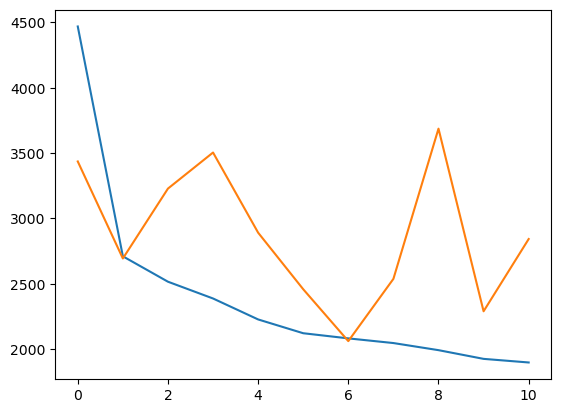

In [56]:
sns.lineplot(df[df['Store'] == "15"]['training_history'].iloc[0].history['loss'])
sns.lineplot(df[df['Store'] == "15"]['training_history'].iloc[0].history['val_loss'])

<AxesSubplot: >

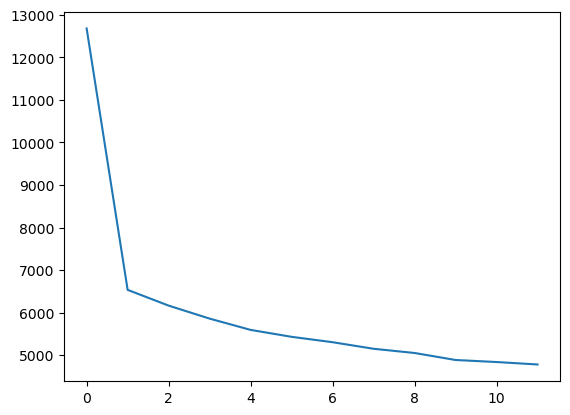

In [12]:
sns.lineplot(df[df['Store'] == "10"]['training_history'].iloc[0].history['loss'])

In [13]:
df[df['Store'] == "2"]['training_history'].iloc[0].history

{'loss': [12383.5263671875,
  6192.76513671875,
  5849.80810546875,
  5483.17041015625,
  5377.62060546875,
  5105.0185546875,
  4978.92431640625,
  4893.5673828125,
  4691.36328125,
  4636.2900390625,
  4481.99267578125],
 'mean_squared_error': [579151616.0,
  144740000.0,
  139120288.0,
  129001408.0,
  128936928.0,
  115760776.0,
  115422336.0,
  112788416.0,
  104265848.0,
  107513976.0,
  100543680.0],
 'mean_absolute_error': [12383.5263671875,
  6192.76513671875,
  5849.80810546875,
  5483.17041015625,
  5377.62060546875,
  5105.0185546875,
  4978.92431640625,
  4893.5673828125,
  4691.36328125,
  4636.2900390625,
  4481.99267578125],
 'val_loss': [4256.9609375,
  5480.71826171875,
  4802.7412109375,
  5423.373046875,
  3910.585205078125,
  7344.2919921875,
  3342.66552734375,
  3875.173828125,
  7275.34130859375,
  4086.5986328125,
  8644.384765625],
 'val_mean_squared_error': [52571944.0,
  75528240.0,
  64995456.0,
  85376488.0,
  43055040.0,
  138645088.0,
  30450428.0,
  416

In [14]:
df.to_csv("./data/performance/individual_result.csv", index=False)

Low data

In [32]:
df_low = pd.DataFrame()

In [33]:
for i in range(0, 45):
    print("_______________________________________STORE_"+str(i+1)+"______________________________________")
    # path = os.path.join("./data/store_level_data/", "store_" + str(i))
    X_train, y_train, x_valid, y_valid, x_test, y_test = load_data(str(i+1), data_dir="./data/store_level_data_2/")
    model = Model().model
    early_stopping = tf.keras.callbacks.EarlyStopping(
                    monitor='val_loss',
                    patience=4,
                    min_delta= 100,
                    restore_best_weights=True,
                )
    try:
        history = model.fit(
                            X_train,
                            y_train,
                            epochs=100,
                            callbacks=[early_stopping],
                            validation_data=(x_valid, y_valid)
                        )
        loss, train_mean_squared_error, train_mean_absolute_error = model.evaluate(
                X_train, y_train, batch_size =100
            )
        loss, test_mean_squared_error, test_mean_absolute_error = model.evaluate(
                x_test, y_test, batch_size =100
            )

        df_sub = pd.DataFrame({"Store":[str(i+1)],
                            "train_mse": [train_mean_squared_error],
                            "train_mae":[train_mean_absolute_error],
                            "test_mse": [test_mean_squared_error],
                            "test_mae":[test_mean_absolute_error],
                            "training_history": history }
                            )
        df_low = pd.concat([df_low, df_sub])
    except:
        failed.append(str(i+1))

_______________________________________STORE_1______________________________________
Epoch 1/100


2022-12-17 15:14:06.942596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 13491.1904 - mean_squared_error: 323792736.0000 - mean_absolute_error: 13491.1904WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1080_input'), name='dense_1080_input', description="created by layer 'dense_1080_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:14:15.046419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 9s 104ms/step - loss: 13491.1904 - mean_squared_error: 323792736.0000 - mean_absolute_error: 13491.1904 - val_loss: 9660.6396 - val_mean_squared_error: 128449520.0000 - val_mean_absolute_error: 9660.6396
Epoch 2/100
33/33 [==============================] - 1s 23ms/step - loss: 9073.4473 - mean_squared_error: 161036816.0000 - mean_absolute_error: 9073.4473 - val_loss: 5098.6396 - val_mean_squared_error: 33025270.0000 - val_mean_absolute_error: 5098.6396
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 6971.6104 - mean_squared_error: 128856496.0000 - mean_absolute_error: 6971.6104 - val_loss: 5638.9419 - val_mean_squared_error: 39889588.0000 - val_mean_absolute_error: 5638.9419
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 6483.7397 - mean_squared_error: 117125464.0000 - mean_absolute_error: 6483.7397 - val_loss: 7699.7891 - val_mean_squared_error: 89284160.0000 - val_mean_absolute_error: 7699.7

2022-12-17 15:14:23.066546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 21746.9082 - mean_squared_error: 845202816.0000 - mean_absolute_error: 21746.9082WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1088_input'), name='dense_1088_input', description="created by layer 'dense_1088_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:14:28.208009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 7s 137ms/step - loss: 21746.9082 - mean_squared_error: 845202816.0000 - mean_absolute_error: 21746.9082 - val_loss: 15008.8594 - val_mean_squared_error: 347408928.0000 - val_mean_absolute_error: 15008.8594
Epoch 2/100
33/33 [==============================] - 1s 22ms/step - loss: 13551.4932 - mean_squared_error: 409453184.0000 - mean_absolute_error: 13551.4932 - val_loss: 11354.5654 - val_mean_squared_error: 209442768.0000 - val_mean_absolute_error: 11354.5645
Epoch 3/100
33/33 [==============================] - 1s 22ms/step - loss: 9905.5469 - mean_squared_error: 312722080.0000 - mean_absolute_error: 9905.5469 - val_loss: 8171.3140 - val_mean_squared_error: 111042520.0000 - val_mean_absolute_error: 8171.3140
Epoch 4/100
33/33 [==============================] - 1s 22ms/step - loss: 9057.5068 - mean_squared_error: 302257696.0000 - mean_absolute_error: 9057.5068 - val_loss: 11967.6270 - val_mean_squared_error: 210183040.0000 - val_mean_absolute_err

2022-12-17 15:14:36.742215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 4433.7720 - mean_squared_error: 38571184.0000 - mean_absolute_error: 4433.7720WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1096_input'), name='dense_1096_input', description="created by layer 'dense_1096_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:14:42.292350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 7s 142ms/step - loss: 4433.7720 - mean_squared_error: 38571184.0000 - mean_absolute_error: 4433.7720 - val_loss: 4695.7017 - val_mean_squared_error: 34595380.0000 - val_mean_absolute_error: 4695.7017
Epoch 2/100
33/33 [==============================] - 1s 22ms/step - loss: 3020.8052 - mean_squared_error: 21924152.0000 - mean_absolute_error: 3020.8052 - val_loss: 3749.2859 - val_mean_squared_error: 22299248.0000 - val_mean_absolute_error: 3749.2859
Epoch 3/100
33/33 [==============================] - 2s 36ms/step - loss: 2550.5237 - mean_squared_error: 18104314.0000 - mean_absolute_error: 2550.5237 - val_loss: 1599.6558 - val_mean_squared_error: 4469742.0000 - val_mean_absolute_error: 1599.6558
Epoch 4/100
33/33 [==============================] - 1s 18ms/step - loss: 2295.7854 - mean_squared_error: 17098316.0000 - mean_absolute_error: 2295.7854 - val_loss: 1233.3145 - val_mean_squared_error: 2878573.0000 - val_mean_absolute_error: 1233.3145
Epoch

2022-12-17 15:14:51.282018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 26418.8887 - mean_squared_error: 1301813120.0000 - mean_absolute_error: 26418.8887WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1104_input'), name='dense_1104_input', description="created by layer 'dense_1104_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:15:00.599450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 11s 149ms/step - loss: 26418.8887 - mean_squared_error: 1301813120.0000 - mean_absolute_error: 26418.8887 - val_loss: 18117.0527 - val_mean_squared_error: 557937152.0000 - val_mean_absolute_error: 18117.0527
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 18111.7695 - mean_squared_error: 695106496.0000 - mean_absolute_error: 18111.7695 - val_loss: 13973.6504 - val_mean_squared_error: 337321664.0000 - val_mean_absolute_error: 13973.6504
Epoch 3/100
33/33 [==============================] - 1s 16ms/step - loss: 13342.7842 - mean_squared_error: 500574272.0000 - mean_absolute_error: 13342.7842 - val_loss: 11173.2812 - val_mean_squared_error: 233080288.0000 - val_mean_absolute_error: 11173.2812
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 10465.5664 - mean_squared_error: 409241472.0000 - mean_absolute_error: 10465.5664 - val_loss: 7690.6177 - val_mean_squared_error: 101637968.0000 - val_mean_absol

2022-12-17 15:15:08.823045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 4181.9941 - mean_squared_error: 28945568.0000 - mean_absolute_error: 4181.9941WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1112_input'), name='dense_1112_input', description="created by layer 'dense_1112_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:15:14.672407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 8s 147ms/step - loss: 4181.9941 - mean_squared_error: 28945568.0000 - mean_absolute_error: 4181.9941 - val_loss: 2643.8066 - val_mean_squared_error: 9971843.0000 - val_mean_absolute_error: 2643.8066
Epoch 2/100
33/33 [==============================] - 1s 22ms/step - loss: 2555.8398 - mean_squared_error: 12331728.0000 - mean_absolute_error: 2555.8398 - val_loss: 2538.9634 - val_mean_squared_error: 8746129.0000 - val_mean_absolute_error: 2538.9634
Epoch 3/100
33/33 [==============================] - 1s 20ms/step - loss: 2077.1384 - mean_squared_error: 9881407.0000 - mean_absolute_error: 2077.1384 - val_loss: 3324.8430 - val_mean_squared_error: 15035049.0000 - val_mean_absolute_error: 3324.8430
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 2022.5520 - mean_squared_error: 9657811.0000 - mean_absolute_error: 2022.5520 - val_loss: 1638.2050 - val_mean_squared_error: 4192316.0000 - val_mean_absolute_error: 1638.2050
Epoch 5/

2022-12-17 15:15:25.792614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 18019.3145 - mean_squared_error: 598416704.0000 - mean_absolute_error: 18019.3145WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1120_input'), name='dense_1120_input', description="created by layer 'dense_1120_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:15:32.083737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 7s 114ms/step - loss: 18019.3145 - mean_squared_error: 598416704.0000 - mean_absolute_error: 18019.3145 - val_loss: 12163.9805 - val_mean_squared_error: 217522240.0000 - val_mean_absolute_error: 12163.9805
Epoch 2/100
33/33 [==============================] - 1s 23ms/step - loss: 11346.8320 - mean_squared_error: 274831808.0000 - mean_absolute_error: 11346.8320 - val_loss: 12263.9902 - val_mean_squared_error: 223397728.0000 - val_mean_absolute_error: 12263.9902
Epoch 3/100
33/33 [==============================] - 1s 23ms/step - loss: 9089.8896 - mean_squared_error: 230702384.0000 - mean_absolute_error: 9089.8896 - val_loss: 5923.5635 - val_mean_squared_error: 53649372.0000 - val_mean_absolute_error: 5923.5635
Epoch 4/100
33/33 [==============================] - 1s 22ms/step - loss: 8113.0210 - mean_squared_error: 218922928.0000 - mean_absolute_error: 8113.0210 - val_loss: 4757.4004 - val_mean_squared_error: 39024308.0000 - val_mean_absolute_error:

2022-12-17 15:15:40.976436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 7232.0469 - mean_squared_error: 112652856.0000 - mean_absolute_error: 7232.0469WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1128_input'), name='dense_1128_input', description="created by layer 'dense_1128_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:15:48.644319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 9s 128ms/step - loss: 7232.0469 - mean_squared_error: 112652856.0000 - mean_absolute_error: 7232.0469 - val_loss: 7671.5400 - val_mean_squared_error: 159269504.0000 - val_mean_absolute_error: 7671.5400
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 4928.5874 - mean_squared_error: 70050752.0000 - mean_absolute_error: 4928.5874 - val_loss: 8210.2422 - val_mean_squared_error: 128094192.0000 - val_mean_absolute_error: 8210.2422
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 4337.7393 - mean_squared_error: 56852464.0000 - mean_absolute_error: 4337.7393 - val_loss: 6042.9302 - val_mean_squared_error: 105271736.0000 - val_mean_absolute_error: 6042.9302
Epoch 4/100
33/33 [==============================] - 1s 21ms/step - loss: 4000.5947 - mean_squared_error: 51181080.0000 - mean_absolute_error: 4000.5947 - val_loss: 5910.1748 - val_mean_squared_error: 97953584.0000 - val_mean_absolute_error: 5910.1748

2022-12-17 15:15:55.565865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 9964.0654 - mean_squared_error: 186595872.0000 - mean_absolute_error: 9964.0654  WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1136_input'), name='dense_1136_input', description="created by layer 'dense_1136_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:16:04.205900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 10s 130ms/step - loss: 9964.0654 - mean_squared_error: 186595872.0000 - mean_absolute_error: 9964.0654 - val_loss: 6442.9570 - val_mean_squared_error: 58485136.0000 - val_mean_absolute_error: 6442.9570
Epoch 2/100
33/33 [==============================] - 1s 22ms/step - loss: 6764.2310 - mean_squared_error: 103867008.0000 - mean_absolute_error: 6764.2310 - val_loss: 5291.5601 - val_mean_squared_error: 36337136.0000 - val_mean_absolute_error: 5291.5601
Epoch 3/100
33/33 [==============================] - 1s 16ms/step - loss: 5582.0239 - mean_squared_error: 83947008.0000 - mean_absolute_error: 5582.0239 - val_loss: 4440.1636 - val_mean_squared_error: 34631120.0000 - val_mean_absolute_error: 4440.1636
Epoch 4/100
33/33 [==============================] - 1s 18ms/step - loss: 4992.0923 - mean_squared_error: 76021320.0000 - mean_absolute_error: 4992.0923 - val_loss: 4196.1470 - val_mean_squared_error: 39382844.0000 - val_mean_absolute_error: 4196.1470


2022-12-17 15:16:12.160144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 7666.7881 - mean_squared_error: 103548616.0000 - mean_absolute_error: 7666.7881WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1144_input'), name='dense_1144_input', description="created by layer 'dense_1144_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:16:20.595266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 10s 119ms/step - loss: 7666.7881 - mean_squared_error: 103548616.0000 - mean_absolute_error: 7666.7881 - val_loss: 4797.0728 - val_mean_squared_error: 33782804.0000 - val_mean_absolute_error: 4797.0728
Epoch 2/100
33/33 [==============================] - 1s 23ms/step - loss: 5034.5767 - mean_squared_error: 50568456.0000 - mean_absolute_error: 5034.5767 - val_loss: 2953.6514 - val_mean_squared_error: 12339165.0000 - val_mean_absolute_error: 2953.6514
Epoch 3/100
33/33 [==============================] - 1s 20ms/step - loss: 4147.9902 - mean_squared_error: 42778852.0000 - mean_absolute_error: 4147.9902 - val_loss: 2939.0872 - val_mean_squared_error: 14175419.0000 - val_mean_absolute_error: 2939.0872
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 3956.9541 - mean_squared_error: 40976460.0000 - mean_absolute_error: 3956.9541 - val_loss: 1893.4921 - val_mean_squared_error: 5391740.5000 - val_mean_absolute_error: 1893.4921
Ep

2022-12-17 15:16:27.659456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 30058.0547 - mean_squared_error: 1768933248.0000 - mean_absolute_error: 30058.0547WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1152_input'), name='dense_1152_input', description="created by layer 'dense_1152_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:16:33.501720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 8s 168ms/step - loss: 30058.0547 - mean_squared_error: 1768933248.0000 - mean_absolute_error: 30058.0547 - val_loss: 19738.9883 - val_mean_squared_error: 591443392.0000 - val_mean_absolute_error: 19738.9883
Epoch 2/100
33/33 [==============================] - 1s 25ms/step - loss: 20000.5840 - mean_squared_error: 973278144.0000 - mean_absolute_error: 20000.5840 - val_loss: 13769.7158 - val_mean_squared_error: 283126144.0000 - val_mean_absolute_error: 13769.7158
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 14792.9404 - mean_squared_error: 766860416.0000 - mean_absolute_error: 14792.9404 - val_loss: 11239.5576 - val_mean_squared_error: 271601024.0000 - val_mean_absolute_error: 11239.5576
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: 14028.6055 - mean_squared_error: 743529152.0000 - mean_absolute_error: 14028.6055 - val_loss: 6709.2886 - val_mean_squared_error: 151995456.0000 - val_mean_absolu

2022-12-17 15:16:41.075417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 15414.3008 - mean_squared_error: 481853984.0000 - mean_absolute_error: 15414.3008WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1160_input'), name='dense_1160_input', description="created by layer 'dense_1160_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:16:49.495281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 10s 120ms/step - loss: 15414.3008 - mean_squared_error: 481853984.0000 - mean_absolute_error: 15414.3008 - val_loss: 8726.0938 - val_mean_squared_error: 123948528.0000 - val_mean_absolute_error: 8726.0938
Epoch 2/100
33/33 [==============================] - 1s 28ms/step - loss: 10311.0996 - mean_squared_error: 273524736.0000 - mean_absolute_error: 10311.0996 - val_loss: 5302.3838 - val_mean_squared_error: 41276664.0000 - val_mean_absolute_error: 5302.3838
Epoch 3/100
33/33 [==============================] - 1s 19ms/step - loss: 7887.7354 - mean_squared_error: 208129680.0000 - mean_absolute_error: 7887.7354 - val_loss: 3505.3455 - val_mean_squared_error: 23060694.0000 - val_mean_absolute_error: 3505.3455
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: 7395.0327 - mean_squared_error: 203614528.0000 - mean_absolute_error: 7395.0327 - val_loss: 3834.7273 - val_mean_squared_error: 24026976.0000 - val_mean_absolute_error: 383

2022-12-17 15:16:56.501907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 17448.7422 - mean_squared_error: 690115008.0000 - mean_absolute_error: 17448.7422WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1168_input'), name='dense_1168_input', description="created by layer 'dense_1168_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:17:02.602129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 8s 160ms/step - loss: 17448.7422 - mean_squared_error: 690115008.0000 - mean_absolute_error: 17448.7422 - val_loss: 13125.1016 - val_mean_squared_error: 398284256.0000 - val_mean_absolute_error: 13125.1016
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 12646.9180 - mean_squared_error: 432780672.0000 - mean_absolute_error: 12646.9180 - val_loss: 12083.5244 - val_mean_squared_error: 366359520.0000 - val_mean_absolute_error: 12083.5244
Epoch 3/100
33/33 [==============================] - 1s 17ms/step - loss: 9250.2471 - mean_squared_error: 288646432.0000 - mean_absolute_error: 9250.2471 - val_loss: 5890.4053 - val_mean_squared_error: 66758184.0000 - val_mean_absolute_error: 5890.4053
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 7263.7358 - mean_squared_error: 224947280.0000 - mean_absolute_error: 7263.7358 - val_loss: 6167.3101 - val_mean_squared_error: 54706352.0000 - val_mean_absolute_error:

2022-12-17 15:17:09.271171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 23523.1035 - mean_squared_error: 1209745664.0000 - mean_absolute_error: 23523.1035WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1176_input'), name='dense_1176_input', description="created by layer 'dense_1176_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:17:15.646676: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 8s 157ms/step - loss: 23523.1035 - mean_squared_error: 1209745664.0000 - mean_absolute_error: 23523.1035 - val_loss: 16363.6836 - val_mean_squared_error: 364390400.0000 - val_mean_absolute_error: 16363.6836
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 16753.8633 - mean_squared_error: 752281984.0000 - mean_absolute_error: 16753.8633 - val_loss: 11153.7168 - val_mean_squared_error: 181668816.0000 - val_mean_absolute_error: 11153.7168
Epoch 3/100
33/33 [==============================] - 1s 17ms/step - loss: 14214.6709 - mean_squared_error: 632055936.0000 - mean_absolute_error: 14214.6709 - val_loss: 15697.8555 - val_mean_squared_error: 395186272.0000 - val_mean_absolute_error: 15697.8555
Epoch 4/100
33/33 [==============================] - 0s 15ms/step - loss: 13021.4199 - mean_squared_error: 617922816.0000 - mean_absolute_error: 13021.4199 - val_loss: 7958.9453 - val_mean_squared_error: 139626672.0000 - val_mean_absolu

2022-12-17 15:17:26.229709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 25007.1016 - mean_squared_error: 1199985280.0000 - mean_absolute_error: 25007.1016WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1184_input'), name='dense_1184_input', description="created by layer 'dense_1184_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:17:35.108209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 11s 145ms/step - loss: 25007.1016 - mean_squared_error: 1199985280.0000 - mean_absolute_error: 25007.1016 - val_loss: 24774.4883 - val_mean_squared_error: 767321024.0000 - val_mean_absolute_error: 24774.4883
Epoch 2/100
33/33 [==============================] - 1s 24ms/step - loss: 17676.4902 - mean_squared_error: 726637120.0000 - mean_absolute_error: 17676.4902 - val_loss: 10535.0391 - val_mean_squared_error: 150115776.0000 - val_mean_absolute_error: 10535.0391
Epoch 3/100
33/33 [==============================] - 1s 19ms/step - loss: 12792.6338 - mean_squared_error: 574259776.0000 - mean_absolute_error: 12792.6338 - val_loss: 7463.0942 - val_mean_squared_error: 84830192.0000 - val_mean_absolute_error: 7463.0942
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 11562.0977 - mean_squared_error: 554073088.0000 - mean_absolute_error: 11562.0977 - val_loss: 7486.4619 - val_mean_squared_error: 83629104.0000 - val_mean_absolute_

2022-12-17 15:17:42.172915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 8562.0625 - mean_squared_error: 157080112.0000 - mean_absolute_error: 8562.0625WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1192_input'), name='dense_1192_input', description="created by layer 'dense_1192_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:17:50.114158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 9s 123ms/step - loss: 8562.0625 - mean_squared_error: 157080112.0000 - mean_absolute_error: 8562.0625 - val_loss: 5364.1299 - val_mean_squared_error: 40117452.0000 - val_mean_absolute_error: 5364.1299
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 5891.2725 - mean_squared_error: 97862816.0000 - mean_absolute_error: 5891.2725 - val_loss: 3513.6555 - val_mean_squared_error: 17843116.0000 - val_mean_absolute_error: 3513.6555
Epoch 3/100
33/33 [==============================] - 1s 17ms/step - loss: 4974.4082 - mean_squared_error: 86977320.0000 - mean_absolute_error: 4974.4082 - val_loss: 3080.9863 - val_mean_squared_error: 14729348.0000 - val_mean_absolute_error: 3080.9863
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: 4866.2979 - mean_squared_error: 86999336.0000 - mean_absolute_error: 4866.2979 - val_loss: 4300.8579 - val_mean_squared_error: 24275114.0000 - val_mean_absolute_error: 4300.8579
Ep

2022-12-17 15:17:56.220936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 7472.4600 - mean_squared_error: 135570080.0000 - mean_absolute_error: 7472.4600WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1200_input'), name='dense_1200_input', description="created by layer 'dense_1200_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:18:01.620163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 7s 133ms/step - loss: 7472.4600 - mean_squared_error: 135570080.0000 - mean_absolute_error: 7472.4600 - val_loss: 5955.1289 - val_mean_squared_error: 90184072.0000 - val_mean_absolute_error: 5955.1289
Epoch 2/100
33/33 [==============================] - 1s 18ms/step - loss: 5256.2500 - mean_squared_error: 94396424.0000 - mean_absolute_error: 5256.2500 - val_loss: 5876.2793 - val_mean_squared_error: 47978512.0000 - val_mean_absolute_error: 5876.2793
Epoch 3/100
33/33 [==============================] - 1s 20ms/step - loss: 4667.7612 - mean_squared_error: 82500920.0000 - mean_absolute_error: 4667.7612 - val_loss: 4238.7559 - val_mean_squared_error: 58224992.0000 - val_mean_absolute_error: 4238.7554
Epoch 4/100
33/33 [==============================] - 0s 14ms/step - loss: 4526.1021 - mean_squared_error: 79341480.0000 - mean_absolute_error: 4526.1021 - val_loss: 5486.4897 - val_mean_squared_error: 41605552.0000 - val_mean_absolute_error: 5486.4897
Ep

2022-12-17 15:18:11.258320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 11896.4238 - mean_squared_error: 273536160.0000 - mean_absolute_error: 11896.4238WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1208_input'), name='dense_1208_input', description="created by layer 'dense_1208_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:18:19.450302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 10s 125ms/step - loss: 11896.4238 - mean_squared_error: 273536160.0000 - mean_absolute_error: 11896.4238 - val_loss: 8207.8096 - val_mean_squared_error: 118254720.0000 - val_mean_absolute_error: 8207.8096
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 8663.9980 - mean_squared_error: 158004912.0000 - mean_absolute_error: 8663.9980 - val_loss: 8642.7734 - val_mean_squared_error: 137947696.0000 - val_mean_absolute_error: 8642.7734
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 7325.5527 - mean_squared_error: 124433744.0000 - mean_absolute_error: 7325.5527 - val_loss: 8872.9131 - val_mean_squared_error: 140884464.0000 - val_mean_absolute_error: 8872.9131
Epoch 4/100
33/33 [==============================] - 1s 15ms/step - loss: 6449.7437 - mean_squared_error: 108430440.0000 - mean_absolute_error: 6449.7437 - val_loss: 5308.7832 - val_mean_squared_error: 54551528.0000 - val_mean_absolute_error: 530

2022-12-17 15:18:27.685681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 16169.0527 - mean_squared_error: 570508864.0000 - mean_absolute_error: 16169.0527WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1216_input'), name='dense_1216_input', description="created by layer 'dense_1216_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:18:32.921997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 7s 118ms/step - loss: 16169.0527 - mean_squared_error: 570508864.0000 - mean_absolute_error: 16169.0527 - val_loss: 10026.0381 - val_mean_squared_error: 201778480.0000 - val_mean_absolute_error: 10026.0381
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 11969.9736 - mean_squared_error: 370115072.0000 - mean_absolute_error: 11969.9736 - val_loss: 7396.3828 - val_mean_squared_error: 119667656.0000 - val_mean_absolute_error: 7396.3828
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 9650.3535 - mean_squared_error: 278194176.0000 - mean_absolute_error: 9650.3535 - val_loss: 4823.4058 - val_mean_squared_error: 32673580.0000 - val_mean_absolute_error: 4823.4058
Epoch 4/100
33/33 [==============================] - 0s 15ms/step - loss: 8458.8125 - mean_squared_error: 248181984.0000 - mean_absolute_error: 8458.8125 - val_loss: 3825.6604 - val_mean_squared_error: 21671998.0000 - val_mean_absolute_error: 3

2022-12-17 15:18:39.306969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 17118.8047 - mean_squared_error: 530246624.0000 - mean_absolute_error: 17118.8047WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1224_input'), name='dense_1224_input', description="created by layer 'dense_1224_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:18:44.561657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 7s 114ms/step - loss: 17118.8047 - mean_squared_error: 530246624.0000 - mean_absolute_error: 17118.8047 - val_loss: 11880.4160 - val_mean_squared_error: 178293792.0000 - val_mean_absolute_error: 11880.4160
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 11779.8564 - mean_squared_error: 277949536.0000 - mean_absolute_error: 11779.8564 - val_loss: 13319.1055 - val_mean_squared_error: 240769152.0000 - val_mean_absolute_error: 13319.1055
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 9433.6758 - mean_squared_error: 220532592.0000 - mean_absolute_error: 9433.6758 - val_loss: 5246.4570 - val_mean_squared_error: 45736096.0000 - val_mean_absolute_error: 5246.4570
Epoch 4/100
33/33 [==============================] - 1s 18ms/step - loss: 7676.4399 - mean_squared_error: 198308288.0000 - mean_absolute_error: 7676.4399 - val_loss: 4617.5820 - val_mean_squared_error: 35209828.0000 - val_mean_absolute_error:

2022-12-17 15:18:52.580308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 25689.0371 - mean_squared_error: 1204774016.0000 - mean_absolute_error: 25689.0371WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1232_input'), name='dense_1232_input', description="created by layer 'dense_1232_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:19:00.000506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 9s 105ms/step - loss: 25689.0371 - mean_squared_error: 1204774016.0000 - mean_absolute_error: 25689.0371 - val_loss: 18446.1270 - val_mean_squared_error: 438225952.0000 - val_mean_absolute_error: 18446.1270
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 17678.6055 - mean_squared_error: 616052352.0000 - mean_absolute_error: 17678.6055 - val_loss: 12088.6875 - val_mean_squared_error: 180161600.0000 - val_mean_absolute_error: 12088.6875
Epoch 3/100
33/33 [==============================] - 1s 20ms/step - loss: 13224.0801 - mean_squared_error: 465651648.0000 - mean_absolute_error: 13224.0801 - val_loss: 9636.9277 - val_mean_squared_error: 121502136.0000 - val_mean_absolute_error: 9636.9277
Epoch 4/100
33/33 [==============================] - 0s 15ms/step - loss: 11256.2949 - mean_squared_error: 418836352.0000 - mean_absolute_error: 11256.2949 - val_loss: 6773.3091 - val_mean_squared_error: 74469352.0000 - val_mean_absolute_

2022-12-17 15:19:07.577442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 10996.7812 - mean_squared_error: 320979008.0000 - mean_absolute_error: 10996.7812WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1240_input'), name='dense_1240_input', description="created by layer 'dense_1240_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:19:13.726753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 8s 142ms/step - loss: 10996.7812 - mean_squared_error: 320979008.0000 - mean_absolute_error: 10996.7812 - val_loss: 8111.3179 - val_mean_squared_error: 158432048.0000 - val_mean_absolute_error: 8111.3179
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 8130.2358 - mean_squared_error: 230301232.0000 - mean_absolute_error: 8130.2358 - val_loss: 6955.2510 - val_mean_squared_error: 62872280.0000 - val_mean_absolute_error: 6955.2510
Epoch 3/100
33/33 [==============================] - 1s 20ms/step - loss: 6330.6387 - mean_squared_error: 164468096.0000 - mean_absolute_error: 6330.6387 - val_loss: 4033.3262 - val_mean_squared_error: 19633118.0000 - val_mean_absolute_error: 4033.3262
Epoch 4/100
33/33 [==============================] - 1s 16ms/step - loss: 5472.9341 - mean_squared_error: 150780832.0000 - mean_absolute_error: 5472.9341 - val_loss: 3508.5417 - val_mean_squared_error: 25386282.0000 - val_mean_absolute_error: 3508.5

2022-12-17 15:19:22.103755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 15042.1738 - mean_squared_error: 428352736.0000 - mean_absolute_error: 15042.1738WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1248_input'), name='dense_1248_input', description="created by layer 'dense_1248_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:19:29.001237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 8s 134ms/step - loss: 15042.1738 - mean_squared_error: 428352736.0000 - mean_absolute_error: 15042.1738 - val_loss: 10207.7705 - val_mean_squared_error: 156096976.0000 - val_mean_absolute_error: 10207.7705
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 10248.3750 - mean_squared_error: 231741520.0000 - mean_absolute_error: 10248.3750 - val_loss: 6049.6621 - val_mean_squared_error: 49375364.0000 - val_mean_absolute_error: 6049.6621
Epoch 3/100
33/33 [==============================] - 1s 17ms/step - loss: 7866.6738 - mean_squared_error: 189990144.0000 - mean_absolute_error: 7866.6738 - val_loss: 4235.6343 - val_mean_squared_error: 31445880.0000 - val_mean_absolute_error: 4235.6343
Epoch 4/100
33/33 [==============================] - 1s 20ms/step - loss: 7489.0493 - mean_squared_error: 175979024.0000 - mean_absolute_error: 7489.0493 - val_loss: 6531.7915 - val_mean_squared_error: 74826256.0000 - val_mean_absolute_error: 65

2022-12-17 15:19:35.451331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 20578.7617 - mean_squared_error: 855845952.0000 - mean_absolute_error: 20578.7617WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1256_input'), name='dense_1256_input', description="created by layer 'dense_1256_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:19:43.192952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 9s 112ms/step - loss: 20578.7617 - mean_squared_error: 855845952.0000 - mean_absolute_error: 20578.7617 - val_loss: 14997.1035 - val_mean_squared_error: 407439776.0000 - val_mean_absolute_error: 14997.1035
Epoch 2/100
33/33 [==============================] - 1s 17ms/step - loss: 14585.5908 - mean_squared_error: 487208032.0000 - mean_absolute_error: 14585.5908 - val_loss: 12695.1182 - val_mean_squared_error: 316890528.0000 - val_mean_absolute_error: 12695.1182
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 11420.9619 - mean_squared_error: 388204736.0000 - mean_absolute_error: 11420.9619 - val_loss: 8550.0586 - val_mean_squared_error: 118680256.0000 - val_mean_absolute_error: 8550.0586
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: 10305.6729 - mean_squared_error: 360069920.0000 - mean_absolute_error: 10305.6729 - val_loss: 7404.1401 - val_mean_squared_error: 122355560.0000 - val_mean_absolute_

2022-12-17 15:19:49.866771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 18125.2754 - mean_squared_error: 541491392.0000 - mean_absolute_error: 18125.2754WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1264_input'), name='dense_1264_input', description="created by layer 'dense_1264_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:19:57.580190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 9s 118ms/step - loss: 18125.2754 - mean_squared_error: 541491392.0000 - mean_absolute_error: 18125.2754 - val_loss: 11555.4219 - val_mean_squared_error: 189797504.0000 - val_mean_absolute_error: 11555.4219
Epoch 2/100
33/33 [==============================] - 1s 25ms/step - loss: 11012.4111 - mean_squared_error: 220589968.0000 - mean_absolute_error: 11012.4111 - val_loss: 9522.6162 - val_mean_squared_error: 134926144.0000 - val_mean_absolute_error: 9522.6162
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 8234.5166 - mean_squared_error: 158298880.0000 - mean_absolute_error: 8234.5166 - val_loss: 7550.1768 - val_mean_squared_error: 74476944.0000 - val_mean_absolute_error: 7550.1768
Epoch 4/100
33/33 [==============================] - 0s 15ms/step - loss: 6244.9229 - mean_squared_error: 121659544.0000 - mean_absolute_error: 6244.9229 - val_loss: 4155.7061 - val_mean_squared_error: 32761280.0000 - val_mean_absolute_error: 4

2022-12-17 15:20:04.627265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 10386.4336 - mean_squared_error: 193040112.0000 - mean_absolute_error: 10386.4336WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1272_input'), name='dense_1272_input', description="created by layer 'dense_1272_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:20:12.752367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 10s 114ms/step - loss: 10386.4336 - mean_squared_error: 193040112.0000 - mean_absolute_error: 10386.4336 - val_loss: 6981.4829 - val_mean_squared_error: 67996176.0000 - val_mean_absolute_error: 6981.4829
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 6729.4546 - mean_squared_error: 99788472.0000 - mean_absolute_error: 6729.4546 - val_loss: 6569.1401 - val_mean_squared_error: 71986056.0000 - val_mean_absolute_error: 6569.1401
Epoch 3/100
33/33 [==============================] - 1s 22ms/step - loss: 5538.2246 - mean_squared_error: 79068448.0000 - mean_absolute_error: 5538.2246 - val_loss: 4036.3208 - val_mean_squared_error: 24011954.0000 - val_mean_absolute_error: 4036.3208
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: 5256.5518 - mean_squared_error: 78706856.0000 - mean_absolute_error: 5256.5518 - val_loss: 6725.8511 - val_mean_squared_error: 73894840.0000 - val_mean_absolute_error: 6725.8511

2022-12-17 15:20:22.485742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 9378.5566 - mean_squared_error: 151916128.0000 - mean_absolute_error: 9378.5566WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1280_input'), name='dense_1280_input', description="created by layer 'dense_1280_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:20:30.692294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 10s 136ms/step - loss: 9378.5566 - mean_squared_error: 151916128.0000 - mean_absolute_error: 9378.5566 - val_loss: 7397.8872 - val_mean_squared_error: 80764704.0000 - val_mean_absolute_error: 7397.8872
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 5903.2964 - mean_squared_error: 71382816.0000 - mean_absolute_error: 5903.2964 - val_loss: 3440.7649 - val_mean_squared_error: 20003088.0000 - val_mean_absolute_error: 3440.7649
Epoch 3/100
33/33 [==============================] - 1s 17ms/step - loss: 4858.7109 - mean_squared_error: 57451912.0000 - mean_absolute_error: 4858.7109 - val_loss: 4373.9136 - val_mean_squared_error: 35893024.0000 - val_mean_absolute_error: 4373.9136
Epoch 4/100
33/33 [==============================] - 1s 18ms/step - loss: 4729.7280 - mean_squared_error: 56492868.0000 - mean_absolute_error: 4729.7280 - val_loss: 3009.1294 - val_mean_squared_error: 19613654.0000 - val_mean_absolute_error: 3009.1294
E

2022-12-17 15:20:37.667805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 20379.1133 - mean_squared_error: 805875904.0000 - mean_absolute_error: 20379.1133WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1288_input'), name='dense_1288_input', description="created by layer 'dense_1288_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:20:45.668587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 9s 120ms/step - loss: 20379.1133 - mean_squared_error: 805875904.0000 - mean_absolute_error: 20379.1133 - val_loss: 14718.3203 - val_mean_squared_error: 346631904.0000 - val_mean_absolute_error: 14718.3203
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 14451.3408 - mean_squared_error: 452544832.0000 - mean_absolute_error: 14451.3408 - val_loss: 11830.2979 - val_mean_squared_error: 177500400.0000 - val_mean_absolute_error: 11830.2979
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 11104.4336 - mean_squared_error: 331232032.0000 - mean_absolute_error: 11104.4336 - val_loss: 7420.4507 - val_mean_squared_error: 115595856.0000 - val_mean_absolute_error: 7420.4507
Epoch 4/100
33/33 [==============================] - 1s 22ms/step - loss: 9718.2822 - mean_squared_error: 301217760.0000 - mean_absolute_error: 9718.2822 - val_loss: 8859.0693 - val_mean_squared_error: 97568560.0000 - val_mean_absolute_err

2022-12-17 15:20:52.489873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 14828.1572 - mean_squared_error: 462945056.0000 - mean_absolute_error: 14828.1572WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1296_input'), name='dense_1296_input', description="created by layer 'dense_1296_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:20:58.566178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 8s 151ms/step - loss: 14828.1572 - mean_squared_error: 462945056.0000 - mean_absolute_error: 14828.1572 - val_loss: 8832.4014 - val_mean_squared_error: 154241792.0000 - val_mean_absolute_error: 8832.4014
Epoch 2/100
33/33 [==============================] - 1s 23ms/step - loss: 10452.9209 - mean_squared_error: 265527120.0000 - mean_absolute_error: 10452.9209 - val_loss: 7826.5801 - val_mean_squared_error: 134422592.0000 - val_mean_absolute_error: 7826.5801
Epoch 3/100
33/33 [==============================] - 1s 17ms/step - loss: 8342.1631 - mean_squared_error: 201878640.0000 - mean_absolute_error: 8342.1631 - val_loss: 4781.1714 - val_mean_squared_error: 32391440.0000 - val_mean_absolute_error: 4781.1714
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: 6343.2061 - mean_squared_error: 153328480.0000 - mean_absolute_error: 6343.2061 - val_loss: 5987.6772 - val_mean_squared_error: 57395232.0000 - val_mean_absolute_error: 598

2022-12-17 15:21:07.808438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 7523.6216 - mean_squared_error: 114468744.0000 - mean_absolute_error: 7523.6216WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1304_input'), name='dense_1304_input', description="created by layer 'dense_1304_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:21:16.598400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 10s 136ms/step - loss: 7523.6216 - mean_squared_error: 114468744.0000 - mean_absolute_error: 7523.6216 - val_loss: 6229.0845 - val_mean_squared_error: 54875388.0000 - val_mean_absolute_error: 6229.0845
Epoch 2/100
33/33 [==============================] - 1s 19ms/step - loss: 5397.4478 - mean_squared_error: 74330480.0000 - mean_absolute_error: 5397.4478 - val_loss: 4994.8237 - val_mean_squared_error: 39770560.0000 - val_mean_absolute_error: 4994.8237
Epoch 3/100
33/33 [==============================] - 1s 19ms/step - loss: 4567.7588 - mean_squared_error: 63825036.0000 - mean_absolute_error: 4567.7588 - val_loss: 2804.0251 - val_mean_squared_error: 13010824.0000 - val_mean_absolute_error: 2804.0251
Epoch 4/100
33/33 [==============================] - 0s 14ms/step - loss: 4104.6616 - mean_squared_error: 57922120.0000 - mean_absolute_error: 4104.6616 - val_loss: 4484.8882 - val_mean_squared_error: 32745460.0000 - val_mean_absolute_error: 4484.8882
E

2022-12-17 15:21:23.035667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 4593.6553 - mean_squared_error: 41382692.0000 - mean_absolute_error: 4593.6553WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1312_input'), name='dense_1312_input', description="created by layer 'dense_1312_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:21:30.262005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 9s 154ms/step - loss: 4593.6553 - mean_squared_error: 41382692.0000 - mean_absolute_error: 4593.6553 - val_loss: 6713.0464 - val_mean_squared_error: 64363088.0000 - val_mean_absolute_error: 6713.0464
Epoch 2/100
33/33 [==============================] - 1s 24ms/step - loss: 1606.9368 - mean_squared_error: 6407502.5000 - mean_absolute_error: 1606.9368 - val_loss: 1478.5607 - val_mean_squared_error: 4632139.0000 - val_mean_absolute_error: 1478.5607
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 1386.9749 - mean_squared_error: 5549090.0000 - mean_absolute_error: 1386.9749 - val_loss: 1745.2394 - val_mean_squared_error: 7540673.0000 - val_mean_absolute_error: 1745.2394
Epoch 4/100
33/33 [==============================] - 1s 16ms/step - loss: 1225.1537 - mean_squared_error: 4616888.5000 - mean_absolute_error: 1225.1537 - val_loss: 1210.6178 - val_mean_squared_error: 2829900.7500 - val_mean_absolute_error: 1210.6178
Epoch 5/1

2022-12-17 15:21:37.514292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 13589.2393 - mean_squared_error: 387699616.0000 - mean_absolute_error: 13589.2393WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1320_input'), name='dense_1320_input', description="created by layer 'dense_1320_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:21:45.608855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 10s 142ms/step - loss: 13589.2393 - mean_squared_error: 387699616.0000 - mean_absolute_error: 13589.2393 - val_loss: 10554.5742 - val_mean_squared_error: 192343296.0000 - val_mean_absolute_error: 10554.5732
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 9374.7607 - mean_squared_error: 214774064.0000 - mean_absolute_error: 9374.7607 - val_loss: 5190.0186 - val_mean_squared_error: 66942352.0000 - val_mean_absolute_error: 5190.0186
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 6204.3813 - mean_squared_error: 116966184.0000 - mean_absolute_error: 6204.3813 - val_loss: 3278.0669 - val_mean_squared_error: 20829508.0000 - val_mean_absolute_error: 3278.0669
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 5376.6177 - mean_squared_error: 103610080.0000 - mean_absolute_error: 5376.6177 - val_loss: 2977.9807 - val_mean_squared_error: 14934384.0000 - val_mean_absolute_error: 297

2022-12-17 15:21:54.167404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 13101.6777 - mean_squared_error: 349746048.0000 - mean_absolute_error: 13101.6777WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1328_input'), name='dense_1328_input', description="created by layer 'dense_1328_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:22:02.476952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 10s 147ms/step - loss: 13101.6777 - mean_squared_error: 349746048.0000 - mean_absolute_error: 13101.6777 - val_loss: 11423.7705 - val_mean_squared_error: 182455744.0000 - val_mean_absolute_error: 11423.7705
Epoch 2/100
33/33 [==============================] - 1s 21ms/step - loss: 9711.0205 - mean_squared_error: 217909344.0000 - mean_absolute_error: 9711.0205 - val_loss: 7761.9741 - val_mean_squared_error: 119718752.0000 - val_mean_absolute_error: 7761.9741
Epoch 3/100
33/33 [==============================] - 1s 18ms/step - loss: 8203.1582 - mean_squared_error: 177729696.0000 - mean_absolute_error: 8203.1582 - val_loss: 6945.0239 - val_mean_squared_error: 65260744.0000 - val_mean_absolute_error: 6945.0239
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: 6608.1196 - mean_squared_error: 138286464.0000 - mean_absolute_error: 6608.1196 - val_loss: 4765.5337 - val_mean_squared_error: 40325556.0000 - val_mean_absolute_error: 47

2022-12-17 15:22:10.352610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 2130.9844 - mean_squared_error: 8210030.0000 - mean_absolute_error: 2130.9844WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1336_input'), name='dense_1336_input', description="created by layer 'dense_1336_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:22:20.275788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 12s 172ms/step - loss: 2130.9844 - mean_squared_error: 8210030.0000 - mean_absolute_error: 2130.9844 - val_loss: 5879.9858 - val_mean_squared_error: 38745376.0000 - val_mean_absolute_error: 5879.9858
Epoch 2/100
30/30 [==============================] - 1s 21ms/step - loss: 967.9250 - mean_squared_error: 2614697.5000 - mean_absolute_error: 967.9250 - val_loss: 1706.3156 - val_mean_squared_error: 4520382.5000 - val_mean_absolute_error: 1706.3156
Epoch 3/100
30/30 [==============================] - 1s 20ms/step - loss: 695.4518 - mean_squared_error: 1258207.7500 - mean_absolute_error: 695.4518 - val_loss: 565.4294 - val_mean_squared_error: 603276.3125 - val_mean_absolute_error: 565.4294
Epoch 4/100
30/30 [==============================] - 1s 22ms/step - loss: 609.7654 - mean_squared_error: 985107.5000 - mean_absolute_error: 609.7654 - val_loss: 340.5382 - val_mean_squared_error: 243556.1562 - val_mean_absolute_error: 340.5382
Epoch 5/100
30/30 [===

2022-12-17 15:22:27.664595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 10052.0107 - mean_squared_error: 181892752.0000 - mean_absolute_error: 10052.0107WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1344_input'), name='dense_1344_input', description="created by layer 'dense_1344_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:22:36.226773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 11s 163ms/step - loss: 10052.0107 - mean_squared_error: 181892752.0000 - mean_absolute_error: 10052.0107 - val_loss: 7083.9790 - val_mean_squared_error: 78058208.0000 - val_mean_absolute_error: 7083.9790
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 6674.3232 - mean_squared_error: 93988464.0000 - mean_absolute_error: 6674.3232 - val_loss: 4946.7256 - val_mean_squared_error: 37245748.0000 - val_mean_absolute_error: 4946.7256
Epoch 3/100
33/33 [==============================] - 1s 19ms/step - loss: 5080.6816 - mean_squared_error: 72673984.0000 - mean_absolute_error: 5080.6816 - val_loss: 5882.5352 - val_mean_squared_error: 43116728.0000 - val_mean_absolute_error: 5882.5352
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: 4884.7744 - mean_squared_error: 71047944.0000 - mean_absolute_error: 4884.7744 - val_loss: 4539.3940 - val_mean_squared_error: 28330790.0000 - val_mean_absolute_error: 4539.3940

2022-12-17 15:22:43.442358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 11925.9131 - mean_squared_error: 350912320.0000 - mean_absolute_error: 11925.9131WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1352_input'), name='dense_1352_input', description="created by layer 'dense_1352_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:22:50.308795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 8s 156ms/step - loss: 11925.9131 - mean_squared_error: 350912320.0000 - mean_absolute_error: 11925.9131 - val_loss: 7746.3745 - val_mean_squared_error: 130344048.0000 - val_mean_absolute_error: 7746.3745
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 8682.2451 - mean_squared_error: 227806160.0000 - mean_absolute_error: 8682.2451 - val_loss: 5644.0601 - val_mean_squared_error: 65416252.0000 - val_mean_absolute_error: 5644.0601
Epoch 3/100
33/33 [==============================] - 1s 20ms/step - loss: 7161.7319 - mean_squared_error: 194179648.0000 - mean_absolute_error: 7161.7319 - val_loss: 3720.7449 - val_mean_squared_error: 31450156.0000 - val_mean_absolute_error: 3720.7449
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 6937.0903 - mean_squared_error: 187768624.0000 - mean_absolute_error: 6937.0903 - val_loss: 7565.3691 - val_mean_squared_error: 96371232.0000 - val_mean_absolute_error: 7565.3

2022-12-17 15:22:56.613065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - ETA: 0s - loss: 3294.2419 - mean_squared_error: 26070338.0000 - mean_absolute_error: 3294.2419WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1360_input'), name='dense_1360_input', description="created by layer 'dense_1360_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:23:04.834042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 10s 220ms/step - loss: 3294.2419 - mean_squared_error: 26070338.0000 - mean_absolute_error: 3294.2419 - val_loss: 838.2094 - val_mean_squared_error: 1501986.2500 - val_mean_absolute_error: 838.2094
Epoch 2/100
28/28 [==============================] - 1s 18ms/step - loss: 1376.5767 - mean_squared_error: 5006067.0000 - mean_absolute_error: 1376.5767 - val_loss: 978.3151 - val_mean_squared_error: 2057300.3750 - val_mean_absolute_error: 978.3151
Epoch 3/100
28/28 [==============================] - 1s 22ms/step - loss: 1006.3021 - mean_squared_error: 2740260.7500 - mean_absolute_error: 1006.3021 - val_loss: 909.3815 - val_mean_squared_error: 1962742.3750 - val_mean_absolute_error: 909.3815
Epoch 4/100
28/28 [==============================] - 0s 17ms/step - loss: 1048.4171 - mean_squared_error: 2948873.5000 - mean_absolute_error: 1048.4171 - val_loss: 594.2904 - val_mean_squared_error: 922863.8125 - val_mean_absolute_error: 594.2904
Epoch 5/100
28/28 

2022-12-17 15:23:11.778417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 5408.0894 - mean_squared_error: 56656448.0000 - mean_absolute_error: 5408.0894WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1368_input'), name='dense_1368_input', description="created by layer 'dense_1368_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:23:18.652008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 9s 180ms/step - loss: 5408.0894 - mean_squared_error: 56656448.0000 - mean_absolute_error: 5408.0894 - val_loss: 1732.1743 - val_mean_squared_error: 4603988.0000 - val_mean_absolute_error: 1732.1743
Epoch 2/100
33/33 [==============================] - 1s 23ms/step - loss: 1890.1552 - mean_squared_error: 9663257.0000 - mean_absolute_error: 1890.1552 - val_loss: 2196.8196 - val_mean_squared_error: 9208651.0000 - val_mean_absolute_error: 2196.8196
Epoch 3/100
33/33 [==============================] - 1s 19ms/step - loss: 1579.5740 - mean_squared_error: 7141112.0000 - mean_absolute_error: 1579.5740 - val_loss: 615.4219 - val_mean_squared_error: 826870.2500 - val_mean_absolute_error: 615.4219
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: 1462.2576 - mean_squared_error: 6173308.0000 - mean_absolute_error: 1462.2576 - val_loss: 1556.5756 - val_mean_squared_error: 4879574.0000 - val_mean_absolute_error: 1556.5756
Epoch 5/100
3

2022-12-17 15:23:25.929060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 3924.4731 - mean_squared_error: 29493320.0000 - mean_absolute_error: 3924.4731WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1376_input'), name='dense_1376_input', description="created by layer 'dense_1376_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:23:35.173623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 12s 186ms/step - loss: 3924.4731 - mean_squared_error: 29493320.0000 - mean_absolute_error: 3924.4731 - val_loss: 2219.2009 - val_mean_squared_error: 5933015.5000 - val_mean_absolute_error: 2219.2009
Epoch 2/100
33/33 [==============================] - 1s 17ms/step - loss: 1494.9045 - mean_squared_error: 5784482.0000 - mean_absolute_error: 1494.9045 - val_loss: 708.3685 - val_mean_squared_error: 1179735.1250 - val_mean_absolute_error: 708.3685
Epoch 3/100
33/33 [==============================] - 1s 17ms/step - loss: 1063.8088 - mean_squared_error: 3025274.5000 - mean_absolute_error: 1063.8088 - val_loss: 1243.2826 - val_mean_squared_error: 3518676.5000 - val_mean_absolute_error: 1243.2826
Epoch 4/100
33/33 [==============================] - 1s 15ms/step - loss: 1005.7057 - mean_squared_error: 2779760.0000 - mean_absolute_error: 1005.7057 - val_loss: 1296.0144 - val_mean_squared_error: 3828073.2500 - val_mean_absolute_error: 1296.0144
Epoch 5/100

2022-12-17 15:23:42.113127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 17847.2969 - mean_squared_error: 642125312.0000 - mean_absolute_error: 17847.2969WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1384_input'), name='dense_1384_input', description="created by layer 'dense_1384_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:23:48.851570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 9s 183ms/step - loss: 17847.2969 - mean_squared_error: 642125312.0000 - mean_absolute_error: 17847.2969 - val_loss: 15984.8896 - val_mean_squared_error: 445121856.0000 - val_mean_absolute_error: 15984.8896
Epoch 2/100
33/33 [==============================] - 1s 38ms/step - loss: 11449.2939 - mean_squared_error: 354063424.0000 - mean_absolute_error: 11449.2939 - val_loss: 17162.9492 - val_mean_squared_error: 498255712.0000 - val_mean_absolute_error: 17162.9492
Epoch 3/100
33/33 [==============================] - 1s 17ms/step - loss: 9195.1826 - mean_squared_error: 291670240.0000 - mean_absolute_error: 9195.1826 - val_loss: 24076.4590 - val_mean_squared_error: 1106083968.0000 - val_mean_absolute_error: 24076.4590
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: 8484.8984 - mean_squared_error: 265321040.0000 - mean_absolute_error: 8484.8984 - val_loss: 23386.6055 - val_mean_squared_error: 956903936.0000 - val_mean_absolute_

2022-12-17 15:23:58.131189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 10530.9512 - mean_squared_error: 187473248.0000 - mean_absolute_error: 10530.9512WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1392_input'), name='dense_1392_input', description="created by layer 'dense_1392_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:24:05.252363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 9s 186ms/step - loss: 10530.9512 - mean_squared_error: 187473248.0000 - mean_absolute_error: 10530.9512 - val_loss: 7965.2549 - val_mean_squared_error: 84201152.0000 - val_mean_absolute_error: 7965.2549
Epoch 2/100
33/33 [==============================] - 1s 23ms/step - loss: 7149.9697 - mean_squared_error: 93599672.0000 - mean_absolute_error: 7149.9697 - val_loss: 6303.4160 - val_mean_squared_error: 58454292.0000 - val_mean_absolute_error: 6303.4160
Epoch 3/100
33/33 [==============================] - 1s 24ms/step - loss: 5249.2397 - mean_squared_error: 70209816.0000 - mean_absolute_error: 5249.2397 - val_loss: 4204.3120 - val_mean_squared_error: 29829966.0000 - val_mean_absolute_error: 4204.3120
Epoch 4/100
33/33 [==============================] - 1s 16ms/step - loss: 4898.7134 - mean_squared_error: 64795076.0000 - mean_absolute_error: 4898.7134 - val_loss: 6727.7930 - val_mean_squared_error: 54176096.0000 - val_mean_absolute_error: 6727.7930


2022-12-17 15:24:14.593302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 14585.0225 - mean_squared_error: 433166112.0000 - mean_absolute_error: 14585.0225WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1400_input'), name='dense_1400_input', description="created by layer 'dense_1400_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:24:23.493034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 11s 183ms/step - loss: 14585.0225 - mean_squared_error: 433166112.0000 - mean_absolute_error: 14585.0225 - val_loss: 9913.1631 - val_mean_squared_error: 142824112.0000 - val_mean_absolute_error: 9913.1631
Epoch 2/100
33/33 [==============================] - 1s 20ms/step - loss: 10041.3535 - mean_squared_error: 246095024.0000 - mean_absolute_error: 10041.3535 - val_loss: 7018.4751 - val_mean_squared_error: 75306872.0000 - val_mean_absolute_error: 7018.4751
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 8068.5454 - mean_squared_error: 210315536.0000 - mean_absolute_error: 8068.5454 - val_loss: 5593.4585 - val_mean_squared_error: 54735096.0000 - val_mean_absolute_error: 5593.4585
Epoch 4/100
33/33 [==============================] - 1s 18ms/step - loss: 7196.2178 - mean_squared_error: 207166272.0000 - mean_absolute_error: 7196.2178 - val_loss: 6375.0640 - val_mean_squared_error: 59030704.0000 - val_mean_absolute_error: 637

2022-12-17 15:24:34.143229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 6101.0703 - mean_squared_error: 61328580.0000 - mean_absolute_error: 6101.0703WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1408_input'), name='dense_1408_input', description="created by layer 'dense_1408_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:24:45.811227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 13s 139ms/step - loss: 6101.0703 - mean_squared_error: 61328580.0000 - mean_absolute_error: 6101.0703 - val_loss: 2840.3926 - val_mean_squared_error: 17105840.0000 - val_mean_absolute_error: 2840.3926
Epoch 2/100
30/30 [==============================] - 1s 24ms/step - loss: 2508.7578 - mean_squared_error: 13790933.0000 - mean_absolute_error: 2508.7578 - val_loss: 870.5452 - val_mean_squared_error: 1867825.7500 - val_mean_absolute_error: 870.5452
Epoch 3/100
30/30 [==============================] - 1s 19ms/step - loss: 1870.0955 - mean_squared_error: 7856837.0000 - mean_absolute_error: 1870.0955 - val_loss: 3036.2224 - val_mean_squared_error: 18012264.0000 - val_mean_absolute_error: 3036.2224
Epoch 4/100
30/30 [==============================] - 1s 18ms/step - loss: 1801.4974 - mean_squared_error: 7760732.0000 - mean_absolute_error: 1801.4974 - val_loss: 3820.4810 - val_mean_squared_error: 27079964.0000 - val_mean_absolute_error: 3820.4810
Epoch 5

2022-12-17 15:24:51.830295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - ETA: 0s - loss: 5926.0439 - mean_squared_error: 69567888.0000 - mean_absolute_error: 5926.0439WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1416_input'), name='dense_1416_input', description="created by layer 'dense_1416_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:25:00.915075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 11s 188ms/step - loss: 5926.0439 - mean_squared_error: 69567888.0000 - mean_absolute_error: 5926.0439 - val_loss: 8133.3320 - val_mean_squared_error: 80102304.0000 - val_mean_absolute_error: 8133.3320
Epoch 2/100
31/31 [==============================] - 1s 19ms/step - loss: 2277.2056 - mean_squared_error: 16929386.0000 - mean_absolute_error: 2277.2056 - val_loss: 2420.3870 - val_mean_squared_error: 10186926.0000 - val_mean_absolute_error: 2420.3870
Epoch 3/100
31/31 [==============================] - 1s 29ms/step - loss: 2034.2292 - mean_squared_error: 15048447.0000 - mean_absolute_error: 2034.2292 - val_loss: 947.8564 - val_mean_squared_error: 1722527.1250 - val_mean_absolute_error: 947.8564
Epoch 4/100
31/31 [==============================] - 1s 18ms/step - loss: 1719.1624 - mean_squared_error: 12365186.0000 - mean_absolute_error: 1719.1624 - val_loss: 1662.2053 - val_mean_squared_error: 6212296.0000 - val_mean_absolute_error: 1662.2053
Epoch 

2022-12-17 15:25:09.001649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 2706.9995 - mean_squared_error: 15342372.0000 - mean_absolute_error: 2706.9995WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1424_input'), name='dense_1424_input', description="created by layer 'dense_1424_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:25:19.434079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 13s 207ms/step - loss: 2706.9995 - mean_squared_error: 15342372.0000 - mean_absolute_error: 2706.9995 - val_loss: 2420.9292 - val_mean_squared_error: 7386665.0000 - val_mean_absolute_error: 2420.9292
Epoch 2/100
33/33 [==============================] - 1s 23ms/step - loss: 1105.2762 - mean_squared_error: 3489459.0000 - mean_absolute_error: 1105.2762 - val_loss: 1124.3567 - val_mean_squared_error: 2725481.2500 - val_mean_absolute_error: 1124.3567
Epoch 3/100
33/33 [==============================] - 0s 15ms/step - loss: 908.2242 - mean_squared_error: 2232088.2500 - mean_absolute_error: 908.2242 - val_loss: 484.2319 - val_mean_squared_error: 523189.2812 - val_mean_absolute_error: 484.2319
Epoch 4/100
33/33 [==============================] - 1s 17ms/step - loss: 890.6313 - mean_squared_error: 2287085.5000 - mean_absolute_error: 890.6313 - val_loss: 1588.3378 - val_mean_squared_error: 4303735.0000 - val_mean_absolute_error: 1588.3378
Epoch 5/100
33/3

2022-12-17 15:25:27.999476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - ETA: 0s - loss: 11690.5322 - mean_squared_error: 260103824.0000 - mean_absolute_error: 11690.5322WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_1432_input'), name='dense_1432_input', description="created by layer 'dense_1432_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-17 15:25:36.698965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


33/33 [==============================] - 11s 226ms/step - loss: 11690.5322 - mean_squared_error: 260103824.0000 - mean_absolute_error: 11690.5322 - val_loss: 9707.9004 - val_mean_squared_error: 153291456.0000 - val_mean_absolute_error: 9707.9004
Epoch 2/100
33/33 [==============================] - 1s 22ms/step - loss: 7476.3516 - mean_squared_error: 149977584.0000 - mean_absolute_error: 7476.3516 - val_loss: 4781.7920 - val_mean_squared_error: 33415406.0000 - val_mean_absolute_error: 4781.7920
Epoch 3/100
33/33 [==============================] - 1s 21ms/step - loss: 6189.7236 - mean_squared_error: 129065000.0000 - mean_absolute_error: 6189.7236 - val_loss: 3661.0247 - val_mean_squared_error: 21960888.0000 - val_mean_absolute_error: 3661.0247
Epoch 4/100
33/33 [==============================] - 1s 18ms/step - loss: 5605.9019 - mean_squared_error: 123607440.0000 - mean_absolute_error: 5605.9019 - val_loss: 4649.4956 - val_mean_squared_error: 30014746.0000 - val_mean_absolute_error: 4649.

In [34]:
df_low

,Store,train_mse,train_mae,test_mse,test_mae,training_history
0,1,1.025898e+08,4902.356934,5.470247e+07,4675.691406,<keras.callbacks.History object at 0x85bedd400>
0,2,2.584481e+08,7078.997070,8.978825e+07,5493.038574,<keras.callbacks.History object at 0x8a5abafa0>
0,3,1.319900e+07,1656.667603,8.688863e+06,1905.488770,<keras.callbacks.History object at 0x8b5e70c70>
0,4,3.344990e+08,8708.626953,1.772921e+08,7303.389648,<keras.callbacks.History object at 0x8c70a4460>
0,5,6.109364e+06,1346.515869,6.237998e+06,1279.891357,<keras.callbacks.History object at 0x89c408520>
0,6,1.897299e+08,8189.295410,1.079772e+08,6379.642090,<keras.callbacks.History object at 0x889814790>
0,7,4.493802e+07,3441.093750,7.600354e+07,5172.157227,<keras.callbacks.History object at 0x8fb3c0880>
0,8,6.388864e+07,3651.803711,3.877386e+07,3348.793701,<keras.callbacks.History object at 0x8df17f1f0>
0,9,2.855582e+07,2608.687988,2.273451e+07,2710.451904,<keras.callbacks.History object at 0x97f5a0220>
0,10,6.234467e+08,10180.028320,1.815507e+08,7068.259277,<keras.callbacks.History object at 0x9d640c7c0>


In [38]:
df_low.to_csv("./data/performance/indiviudal_low.csv", index=False)

In [35]:
%ls

78083.53s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


README.md  conda.yml  data/      models/    notebooks/ src/


In [39]:
df_2 = pd.read_csv("./data/performance/fl_low_data.csv")
df_2['model'] = 'Federated learning'

In [40]:
df_low['model'] = 'individualised'

In [41]:
df_final = pd.concat([df_2, df_low])

In [46]:
df_final['Store'] = df_final['Store'].astype('str')

(0.0, 10000.0)

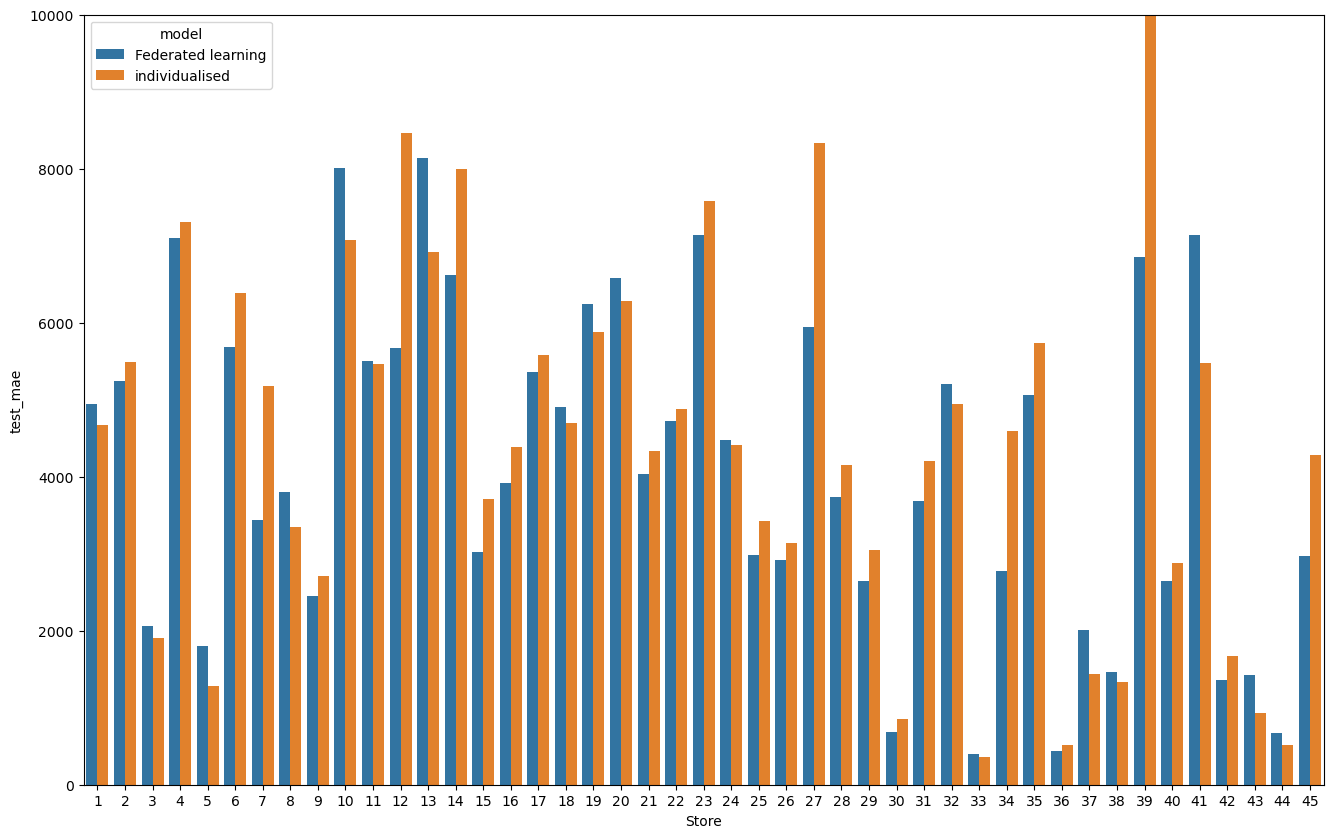

In [47]:
import seaborn as sns 

plt.figure(figsize=(16,10))
bar = sns.barplot(data=df_final, x='Store', y='test_mae', hue='model')
bar.set_ylim(top=10000)

In [50]:
best = []
for i in df_final['Store'].unique():
    best_model = df_final[df_final['Store'] == i].sort_values(by='test_mae').iloc[0]['model']
    best.append(best_model)

In [53]:
from collections import Counter

Counter(best)

Counter({'individualised': 18, 'Federated learning': 27})